Q.No-01    Explain GET and POST methods.

Ans :-

The GET and POST methods are two common HTTP request methods used in web development. They are used to send data from a client (such as a web browser) to a server and retrieve a response. Here's an explanation of each method:

1. `GET Method`:

The GET method is primarily used to retrieve data from a server. When a client makes a GET request, it asks the server to send back a specific resource or data located at a specific URL. This method is idempotent, meaning it should not have any side effects on the server or the data.

GET requests have the following characteristics:
- The data sent with a GET request is appended to the URL in the form of query parameters. For example, a GET request to retrieve information about a user might look like: `https://example.com/api/user?id=123`.
- GET requests can be bookmarked, cached, and shared, as they do not modify any data on the server.
- GET requests are visible in the browser's address bar, which means any sensitive data should not be sent as part of the URL.
- GET requests have a limited length for the data they can send, typically around 2048 characters.

In [1]:
from flask import Flask, jsonify, url_for

app = Flask(__name__)

books = [
    {
        'id': 1,
        'title': 'The Great Gatsby',
        'author': 'F. Scott Fitzgerald',
    },
    {
        'id': 2,
        'title': 'To Kill a Mockingbird',
        'author': 'Harper Lee',
    },
    {
        'id': 3,
        'title': '1984',
        'author': 'George Orwell',
    }
]

@app.route('/', methods=['GET'], endpoint='home')
def home():
    books_url = url_for('get_books', _external=True)
    return f"Welcome to the Book API! Check out the books <a href='{books_url}'>here</a>."

@app.route('/books', methods=['GET'])
def get_books():
    # Generate URL for individual book endpoints
    for book in books:
        book['url'] = url_for('get_book', book_id=book['id'], _external=True)
    return jsonify(books)

@app.route('/books/<int:book_id>', methods=['GET'])
def get_book(book_id):
    book = next((book for book in books if book['id'] == book_id), None)
    if book:
        book['url'] = url_for('get_book', book_id=book['id'], _external=True)
        return jsonify(book)
    else:
        return jsonify({'error': 'Book not found'}), 404

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [17/Jul/2023 19:12:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2023 19:12:06] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [17/Jul/2023 19:12:08] "GET /books HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2023 19:12:11] "GET /books/1 HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2023 19:12:13] "GET /books/1 HTTP/1.1" 200 -


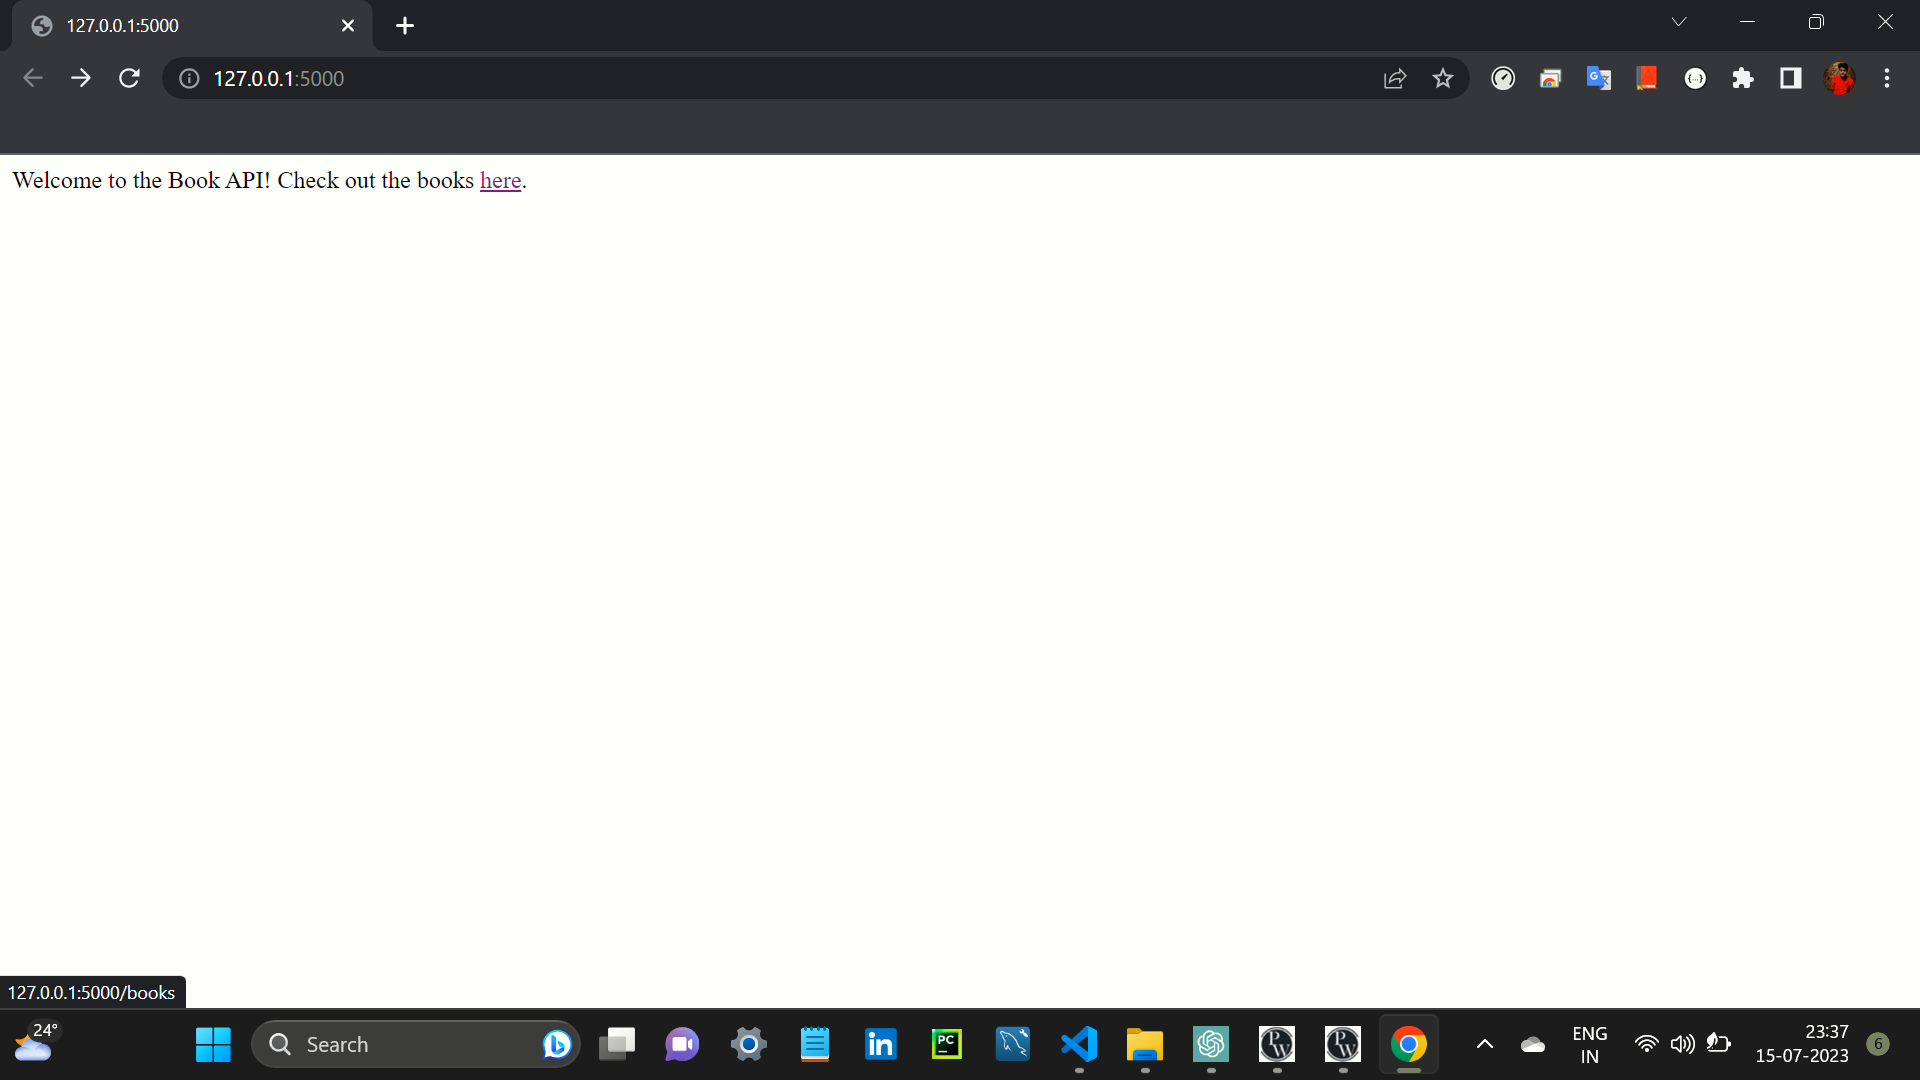

In [71]:
from IPython.display import Image
Image(filename='Home.png')

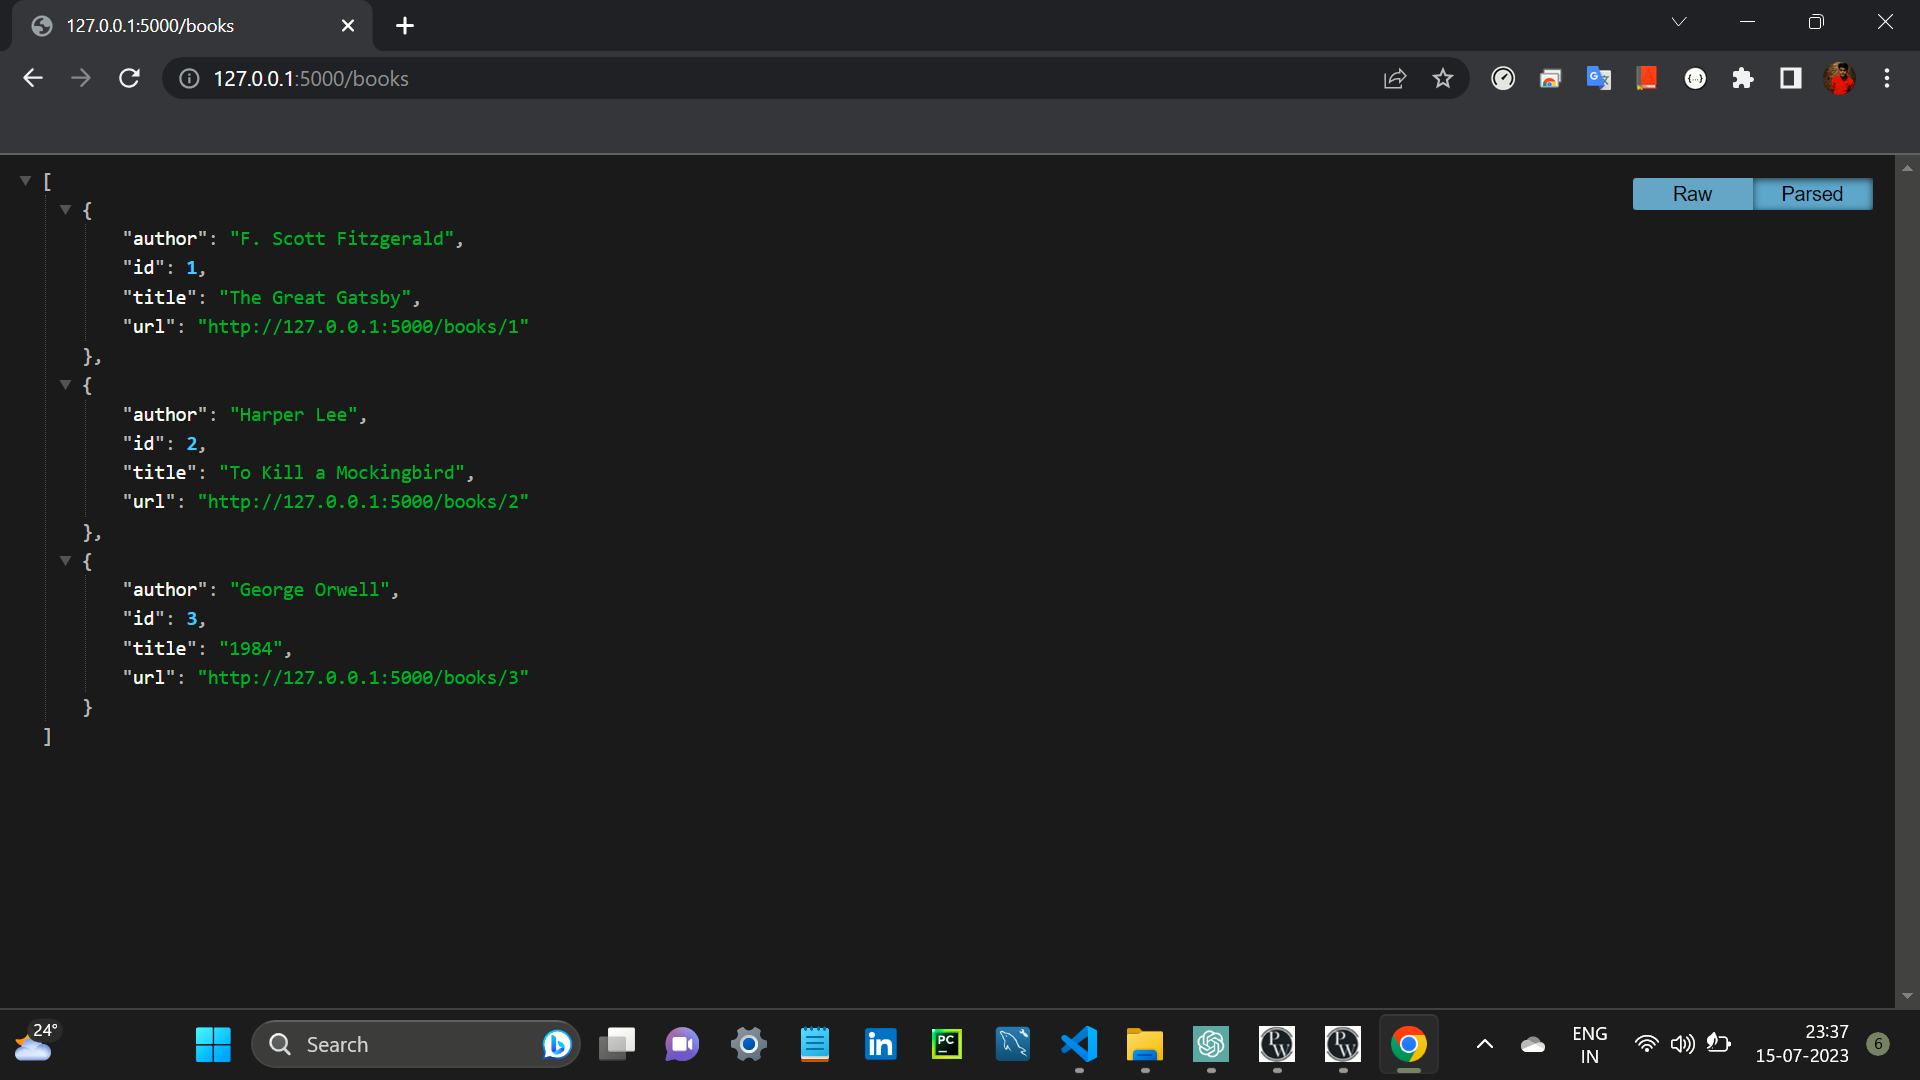

In [72]:
from IPython.display import Image
Image(filename='Book_List.png')

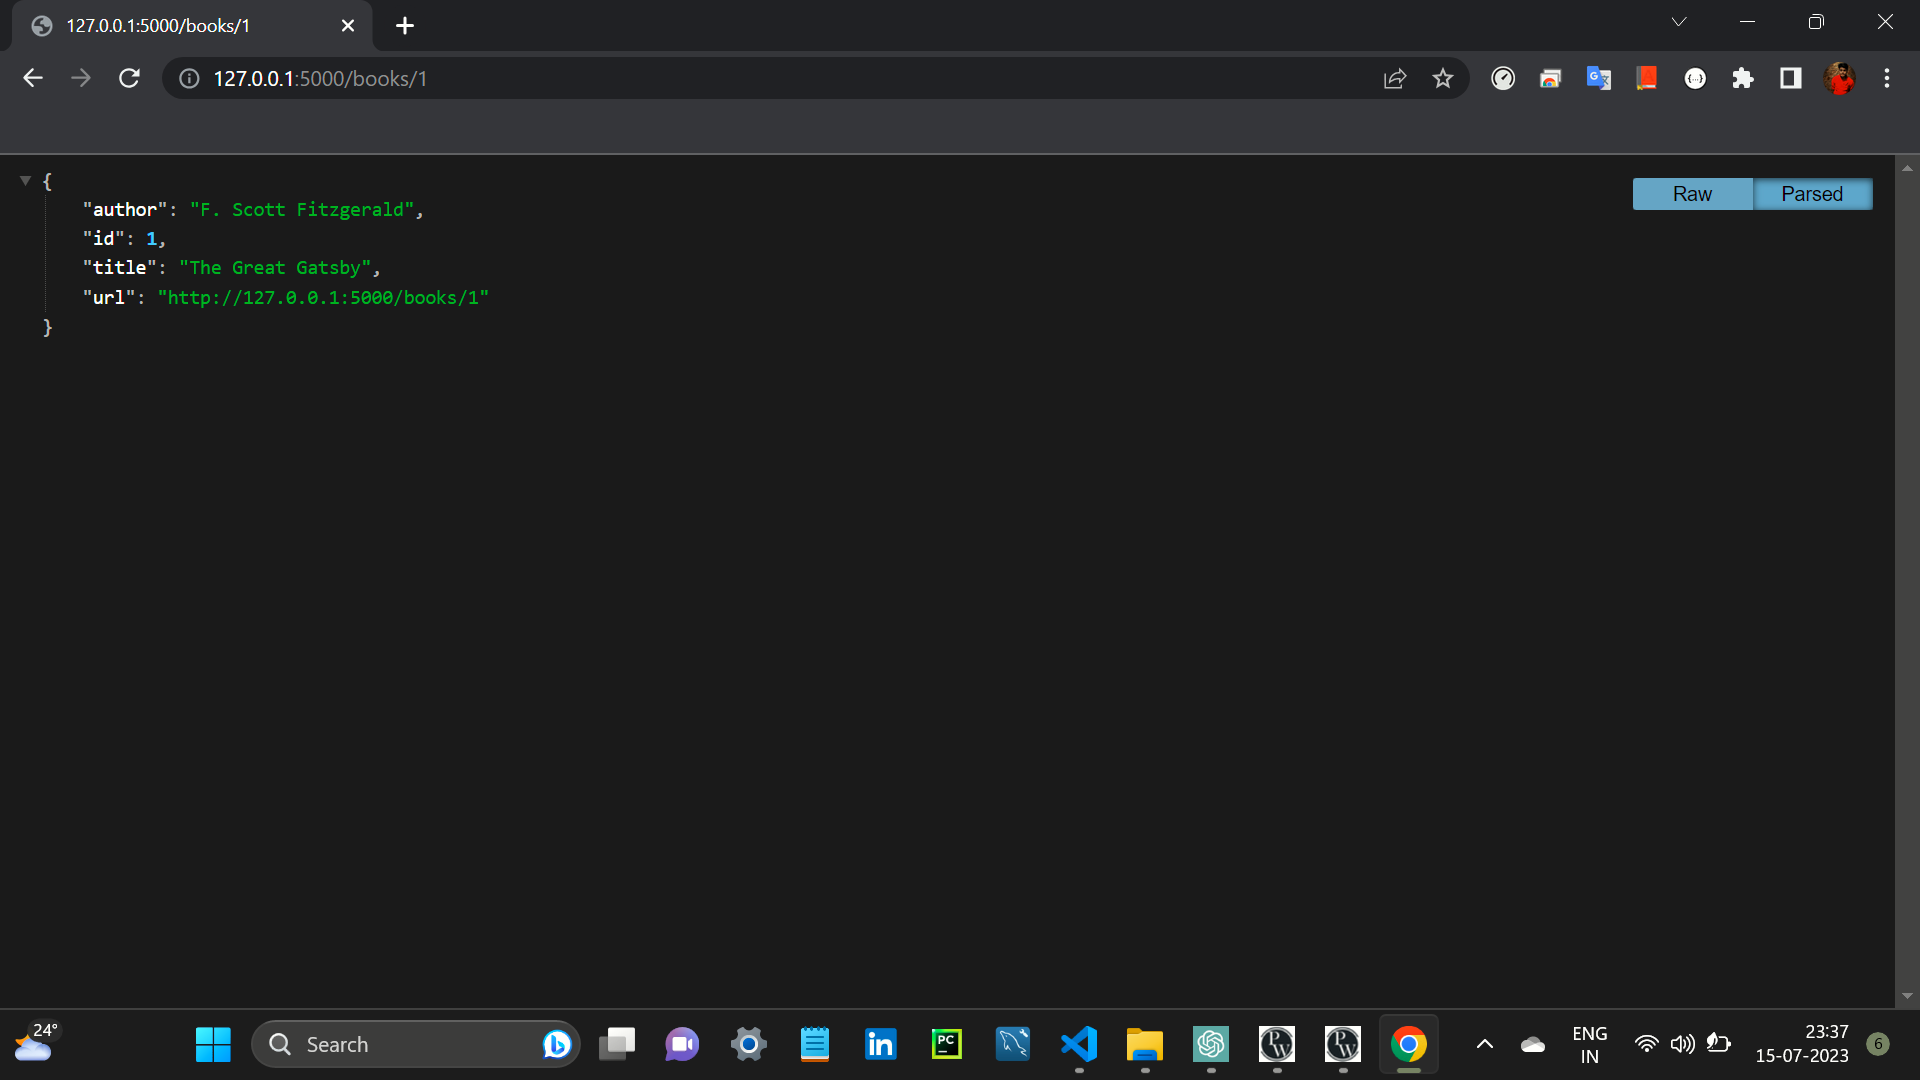

In [11]:
from IPython.display import Image
Image(filename='Book1.png')

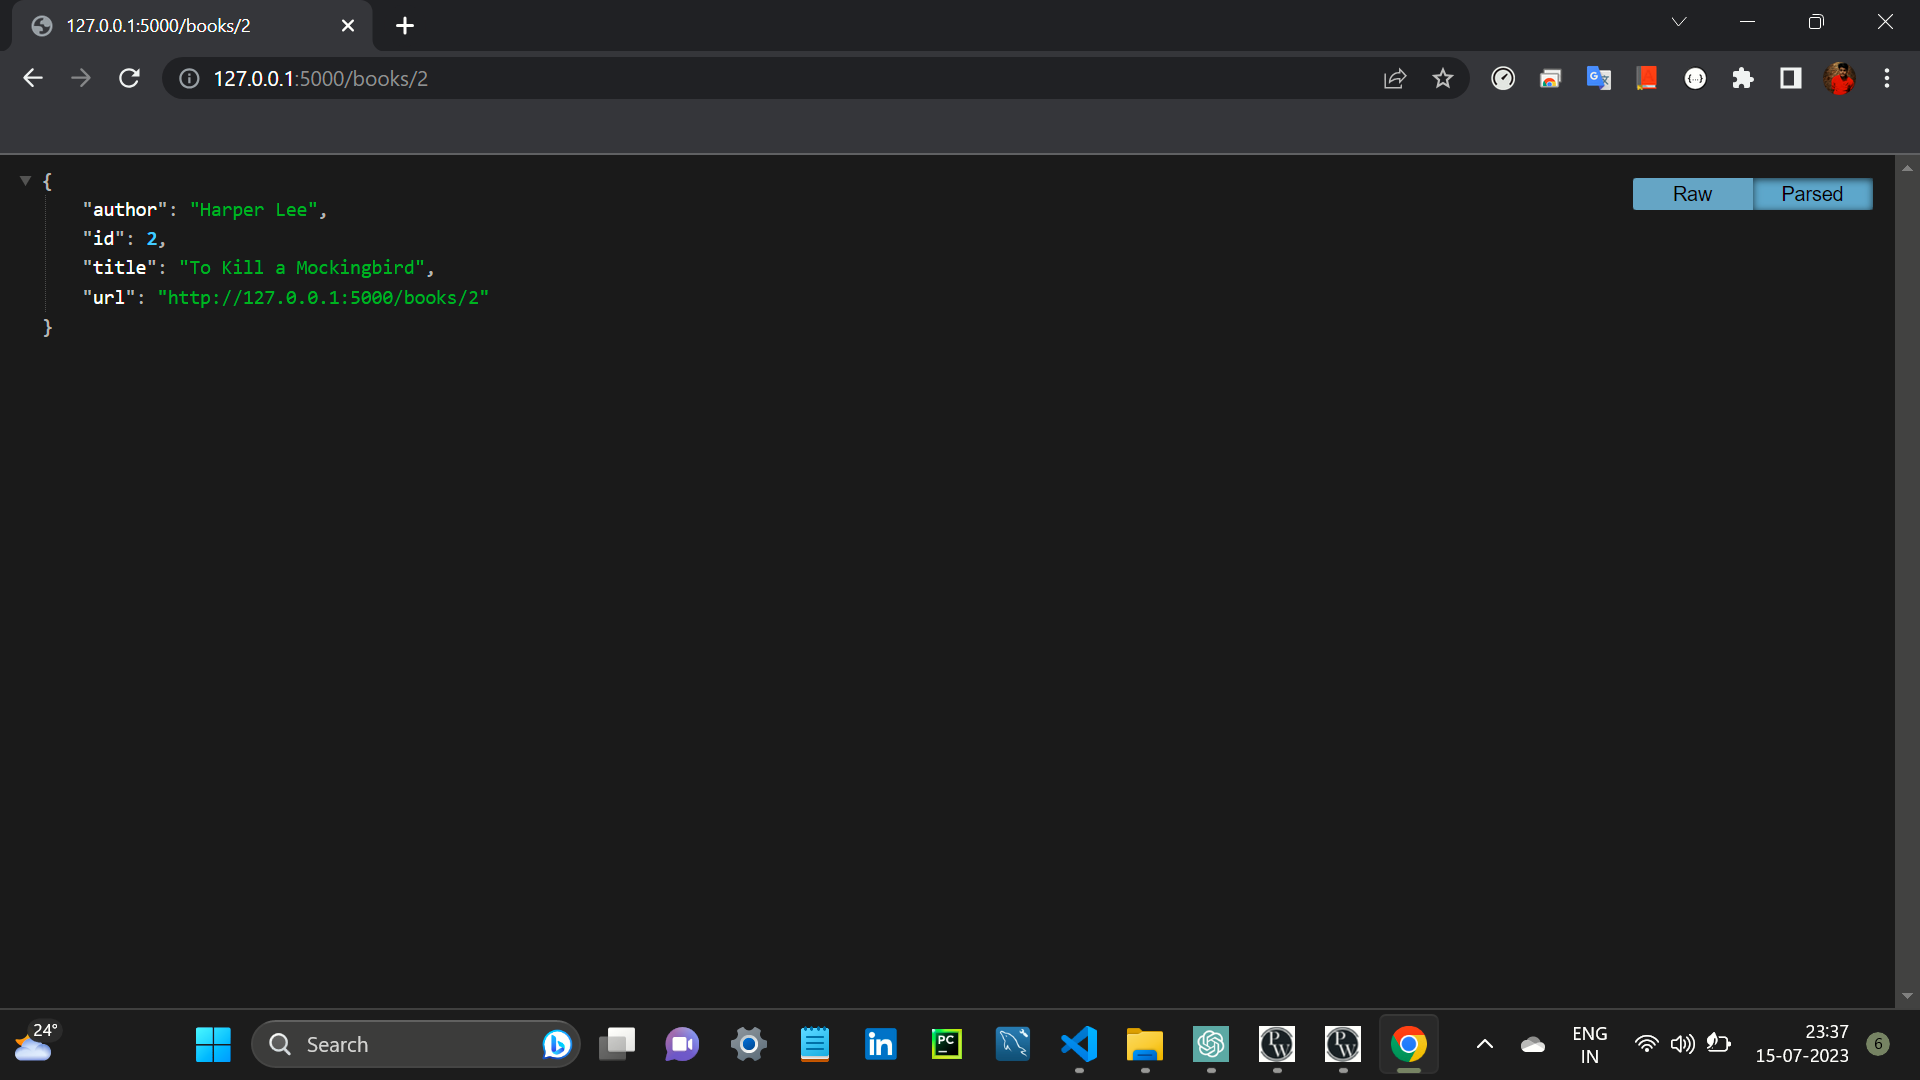

In [74]:
from IPython.display import Image
Image(filename='Book2.png')

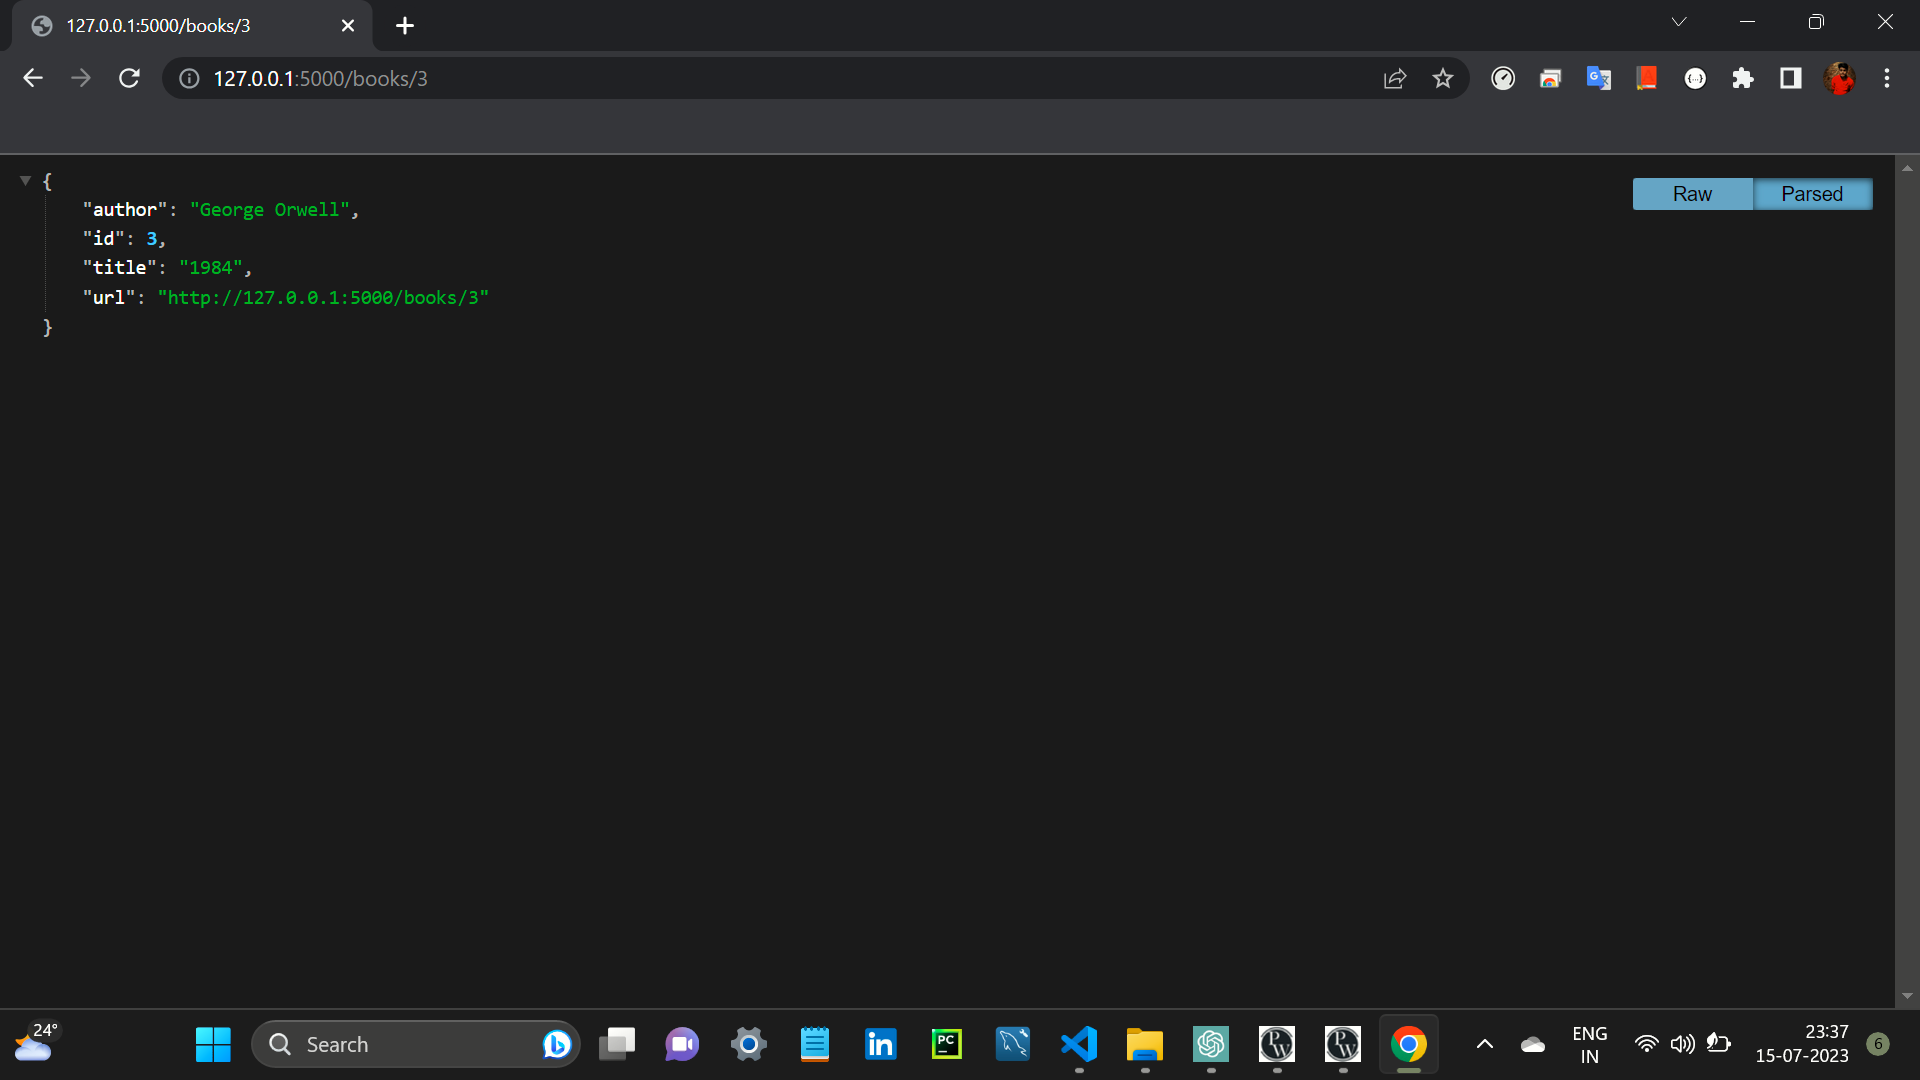

In [75]:
from IPython.display import Image
Image(filename='Book3.png')

2. `POST Method`:

The POST method is used to send data to the server to create or update a resource. When a client makes a POST request, it includes the data in the body of the request, rather than in the URL. This method is not idempotent, meaning multiple identical POST requests may have different effects on the server or the data.

POST requests have the following characteristics:
- The data sent with a POST request is included in the body of the request, typically in the form of JSON or form data.
- POST requests do not expose the data in the URL, making them more suitable for sending sensitive or large amounts of data.
- POST requests are not cached by default and cannot be bookmarked or shared directly.
- There is no limitation on the length of data that can be sent with a POST request.
- POST requests can trigger server-side actions, such as storing data in a database or updating resources.

In [10]:
from flask import Flask,request ,render_template , jsonify

app = Flask(__name__)


@app.route('/')
def home_page():
    return render_template('index.html')


@app.route('/math',methods=['POST'])
def math_ops():
    if(request.method == 'POST'):
        ops = request.form['operation']
        num1 = int(request.form['num1'])
        num2 = int(request.form['num2'])
        if ops == 'add':
            r = num1+num2
            result = "The sum of " + str(num1) + ' and ' + str(num2) + " is " + str(r)
        if ops == 'subtract':
            r = num1-num2
            result = "The subtract of " + str(num1) + ' and ' + str(num2) + " is " + str(r)
        if ops == 'multiply':
            r = num1*num2
            result = "The multiply of " + str(num1) + ' and ' + str(num2) + " is " + str(r)
        if ops == 'divide':
            r = num1/num2
            result = "The divide of " + str(num1) + ' and ' + str(num2) + " is " + str(r)
            
        return render_template('results.html' , result = result)


if __name__=="__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [17/Jul/2023 19:57:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2023 19:57:50] "GET /static/css/style.css HTTP/1.1" 304 -
127.0.0.1 - - [17/Jul/2023 19:59:24] "POST /math HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2023 19:59:24] "GET /style.css HTTP/1.1" 404 -
127.0.0.1 - - [17/Jul/2023 19:59:25] "GET /static/css/style.css HTTP/1.1" 304 -


*    `Select Operation` :-

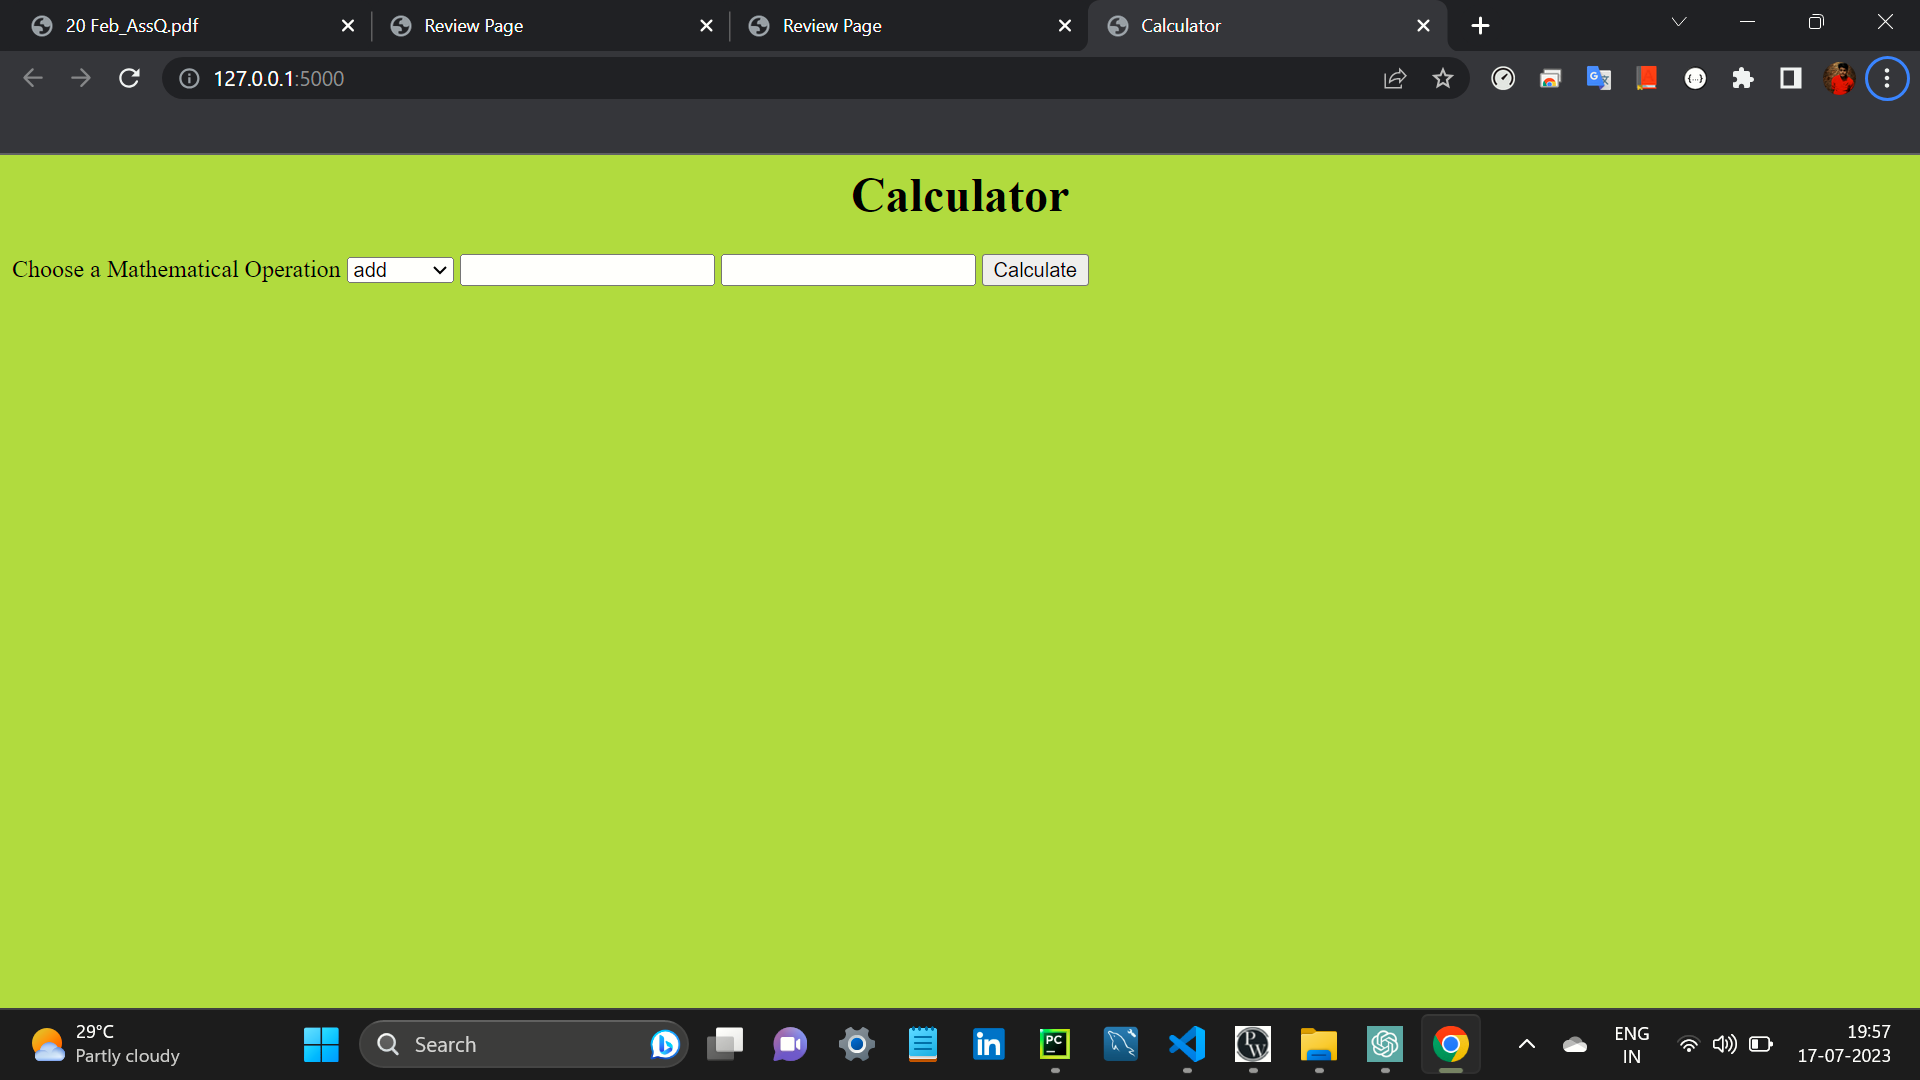

In [13]:
from IPython.display import Image
Image(filename='Operation.png')

*    `Enter First Number` :-

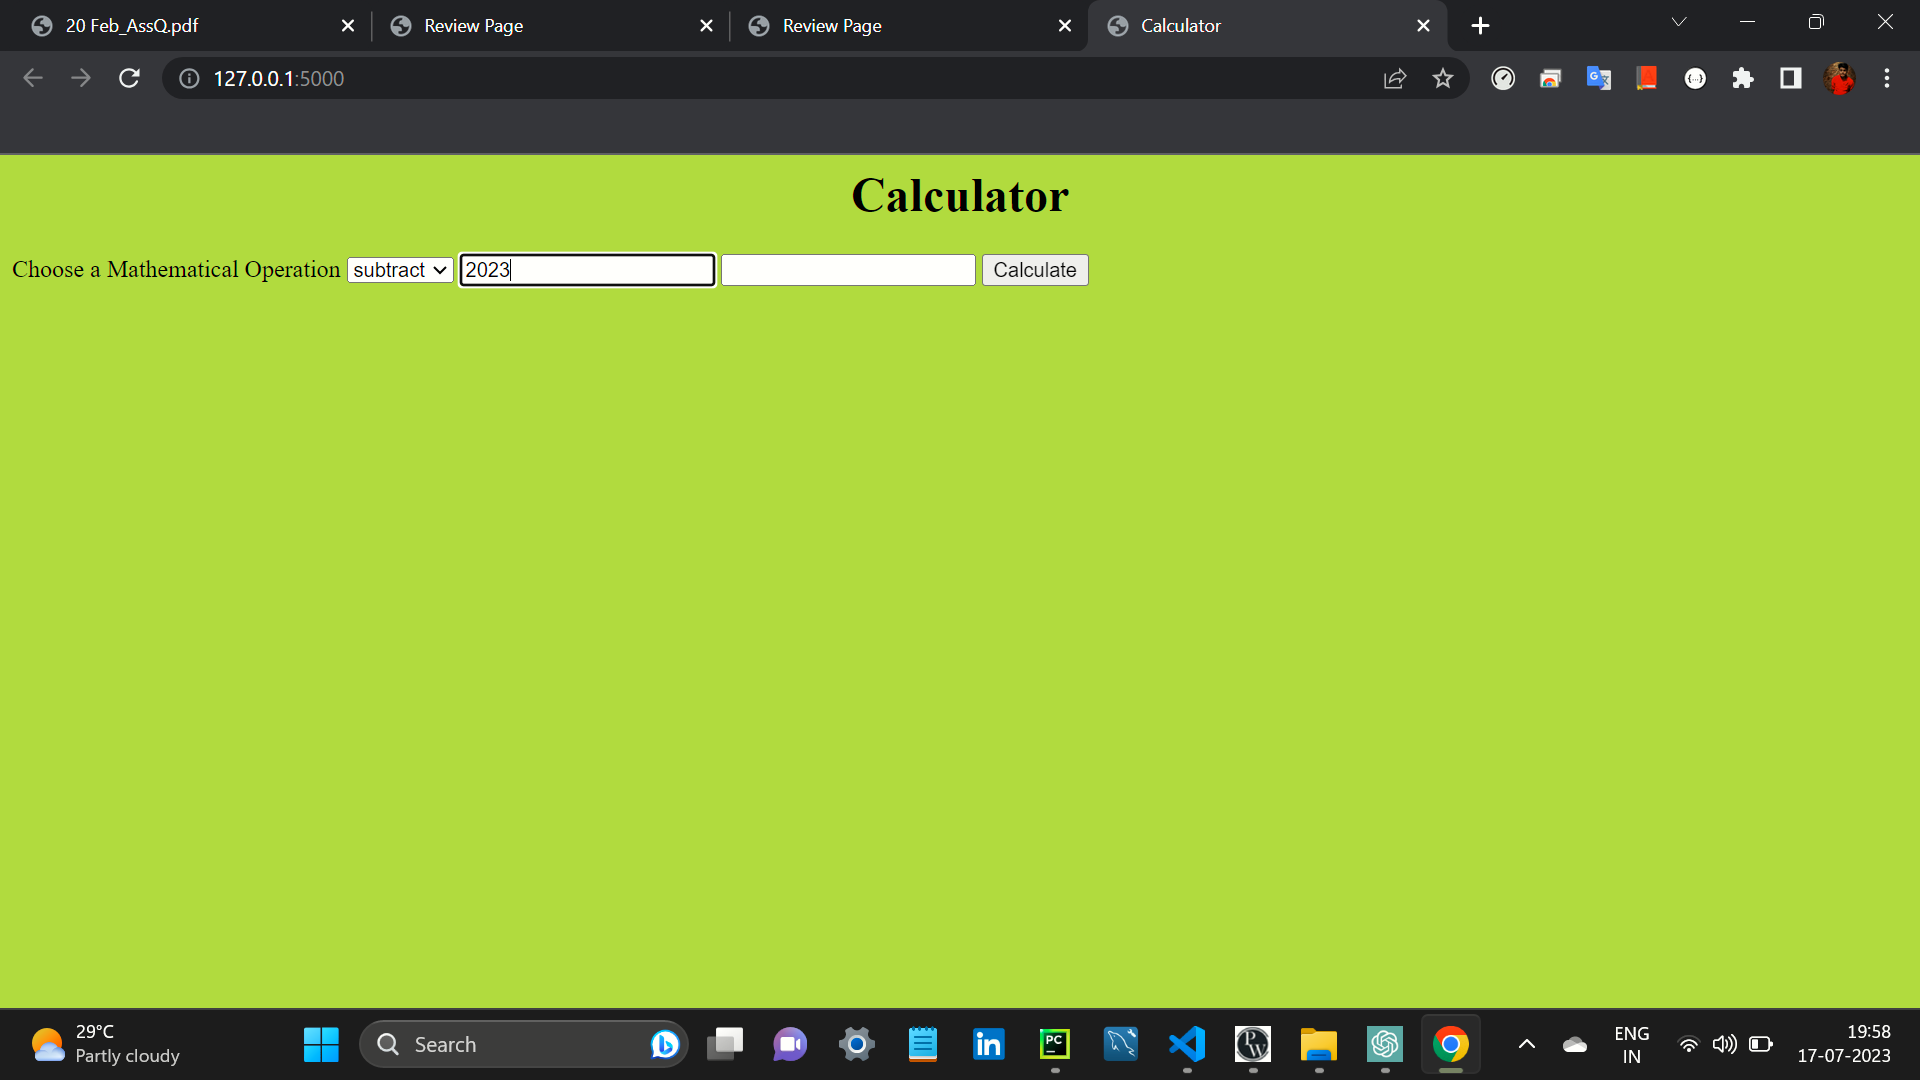

In [14]:
from IPython.display import Image
Image(filename='First_Number.png')

*    `Enter Second Number` :-

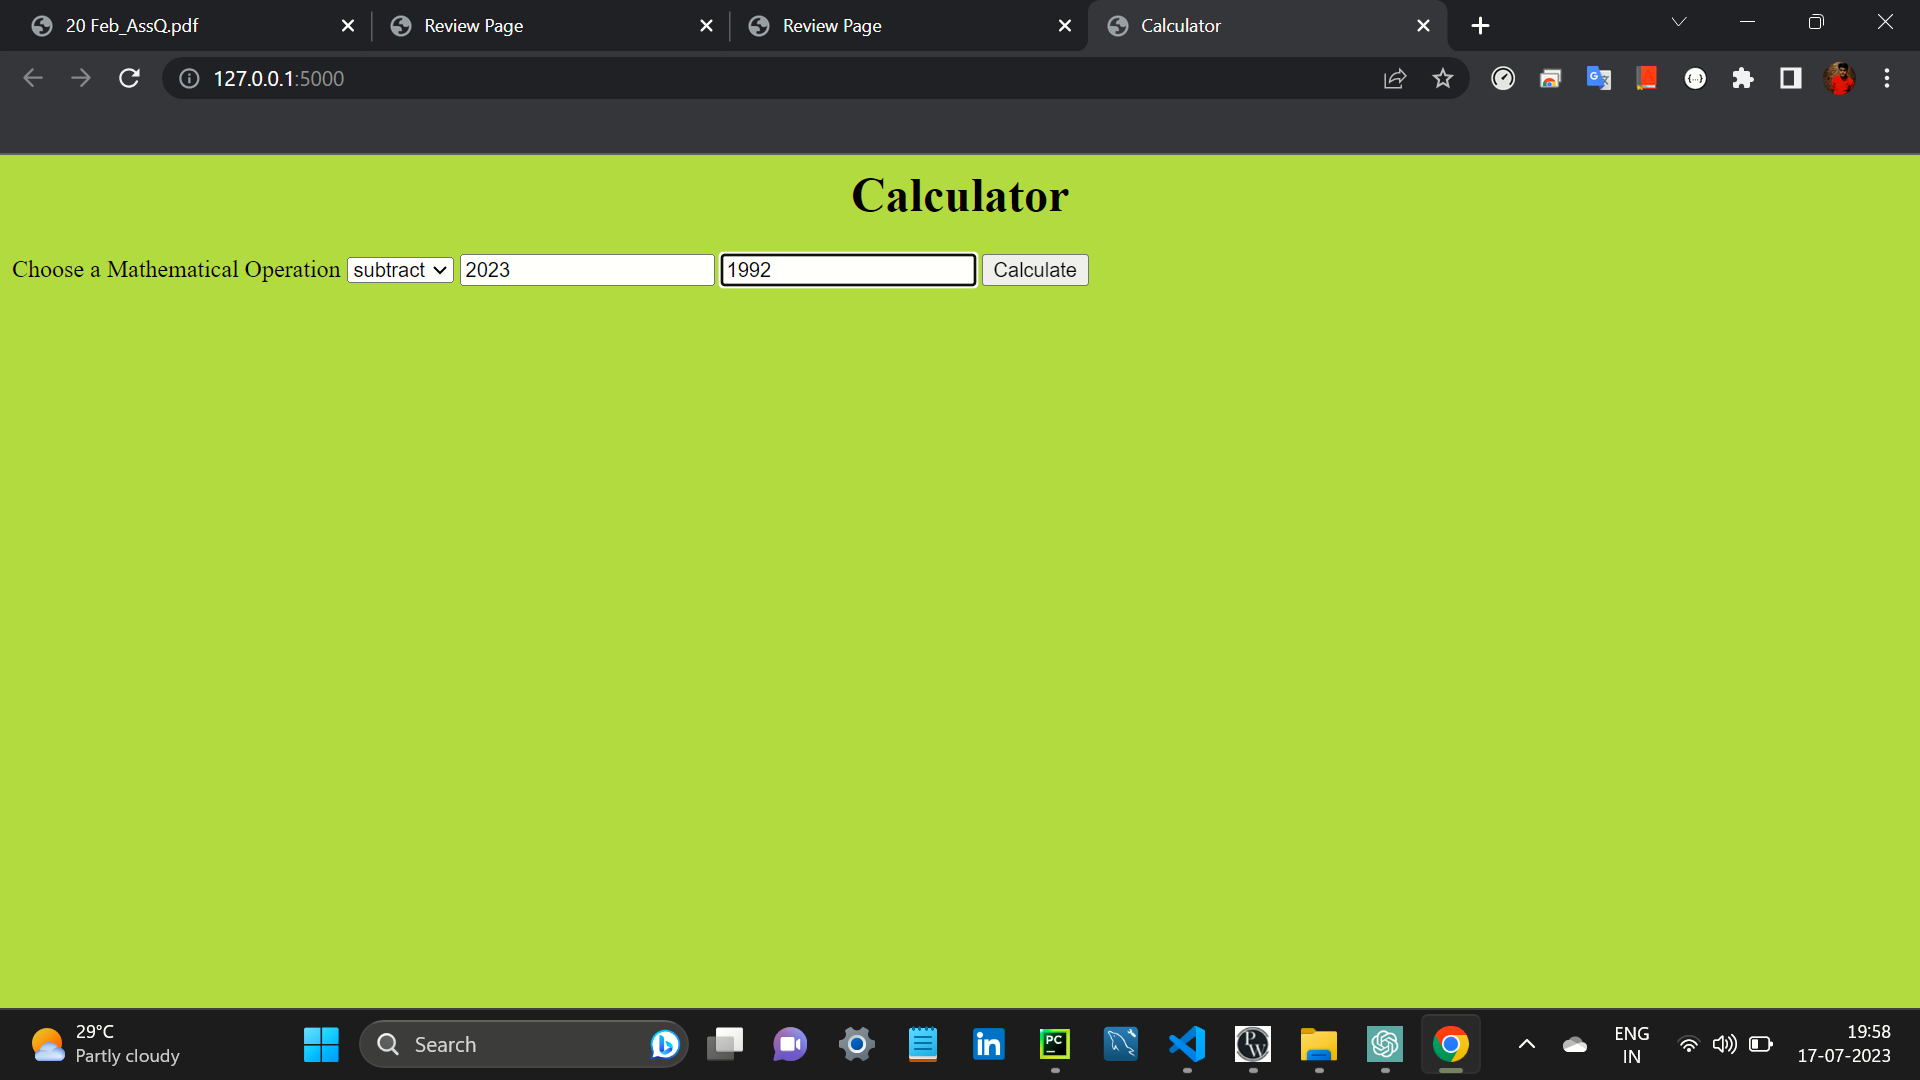

In [15]:
from IPython.display import Image
Image(filename='Second_Number.png')

*    `Tap Enter` :-

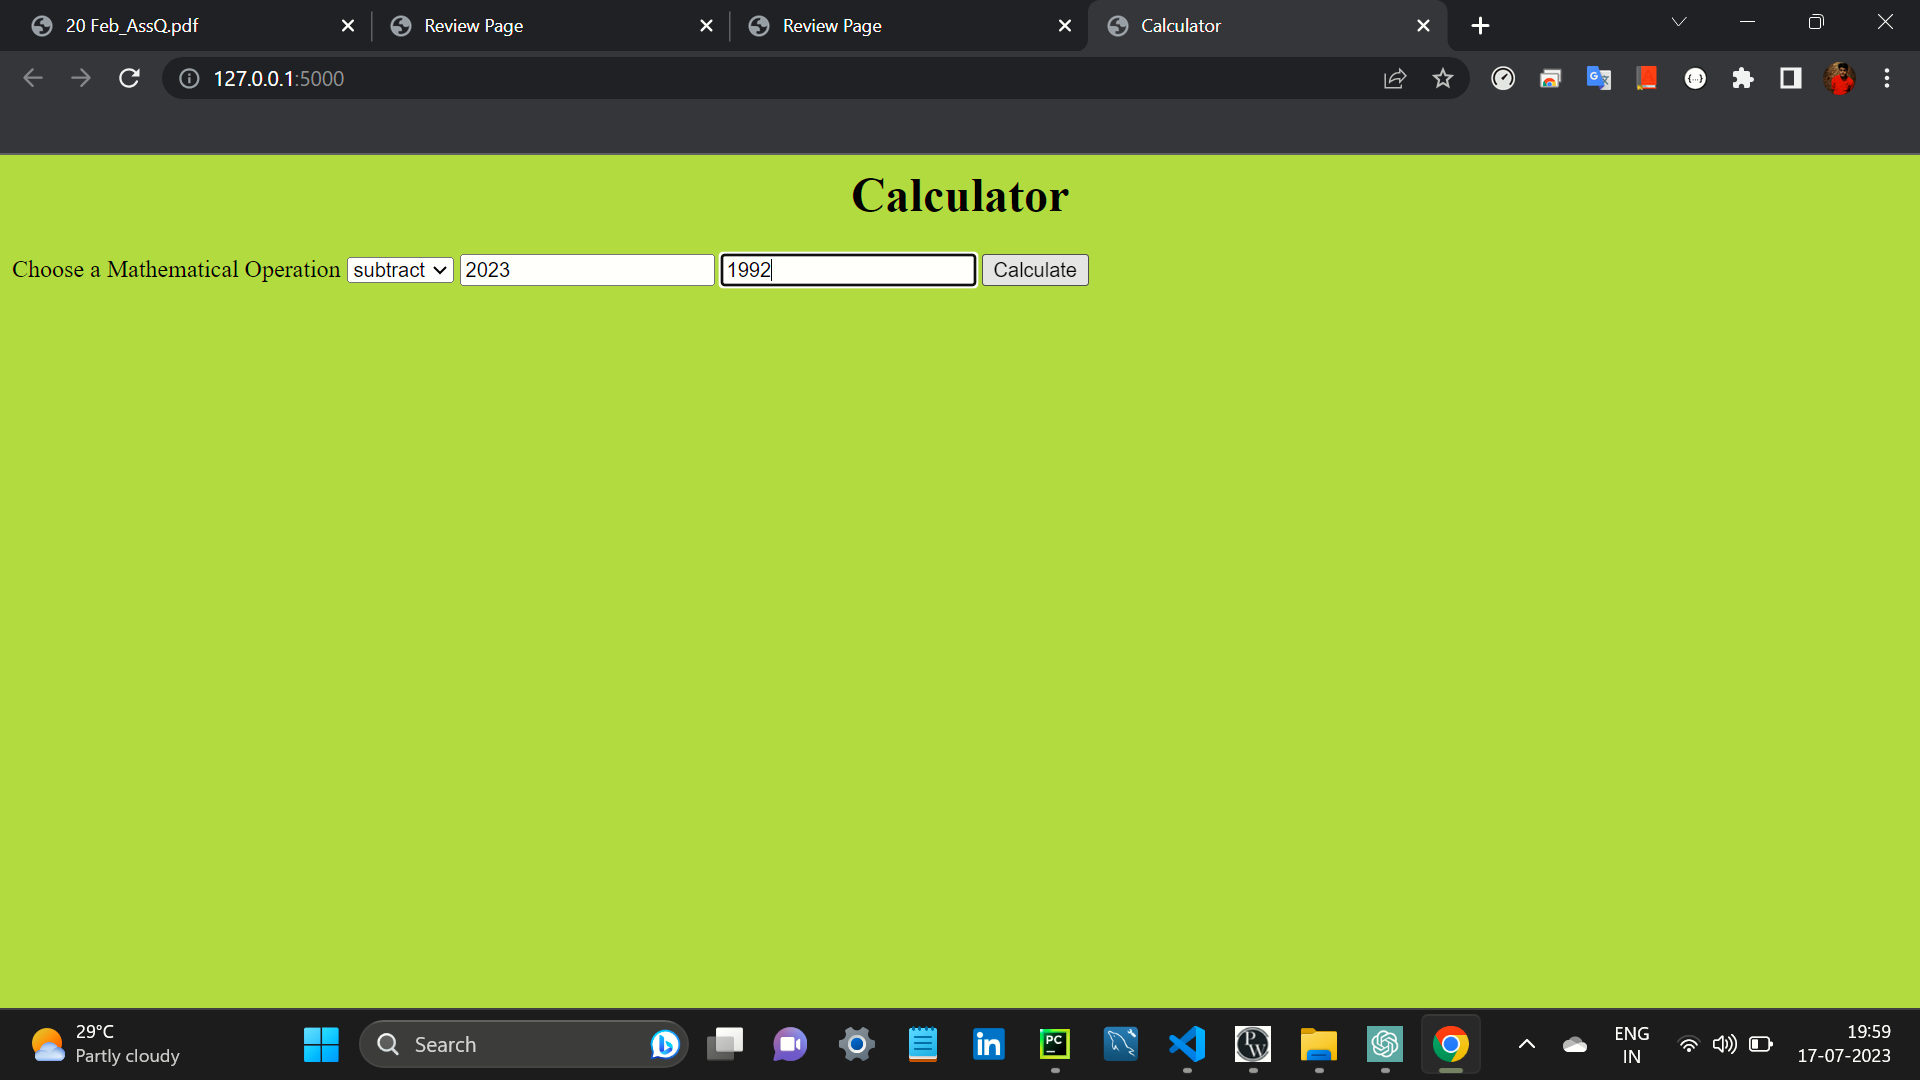

In [16]:
from IPython.display import Image
Image(filename='Calculate.png')

*    `Result` :-

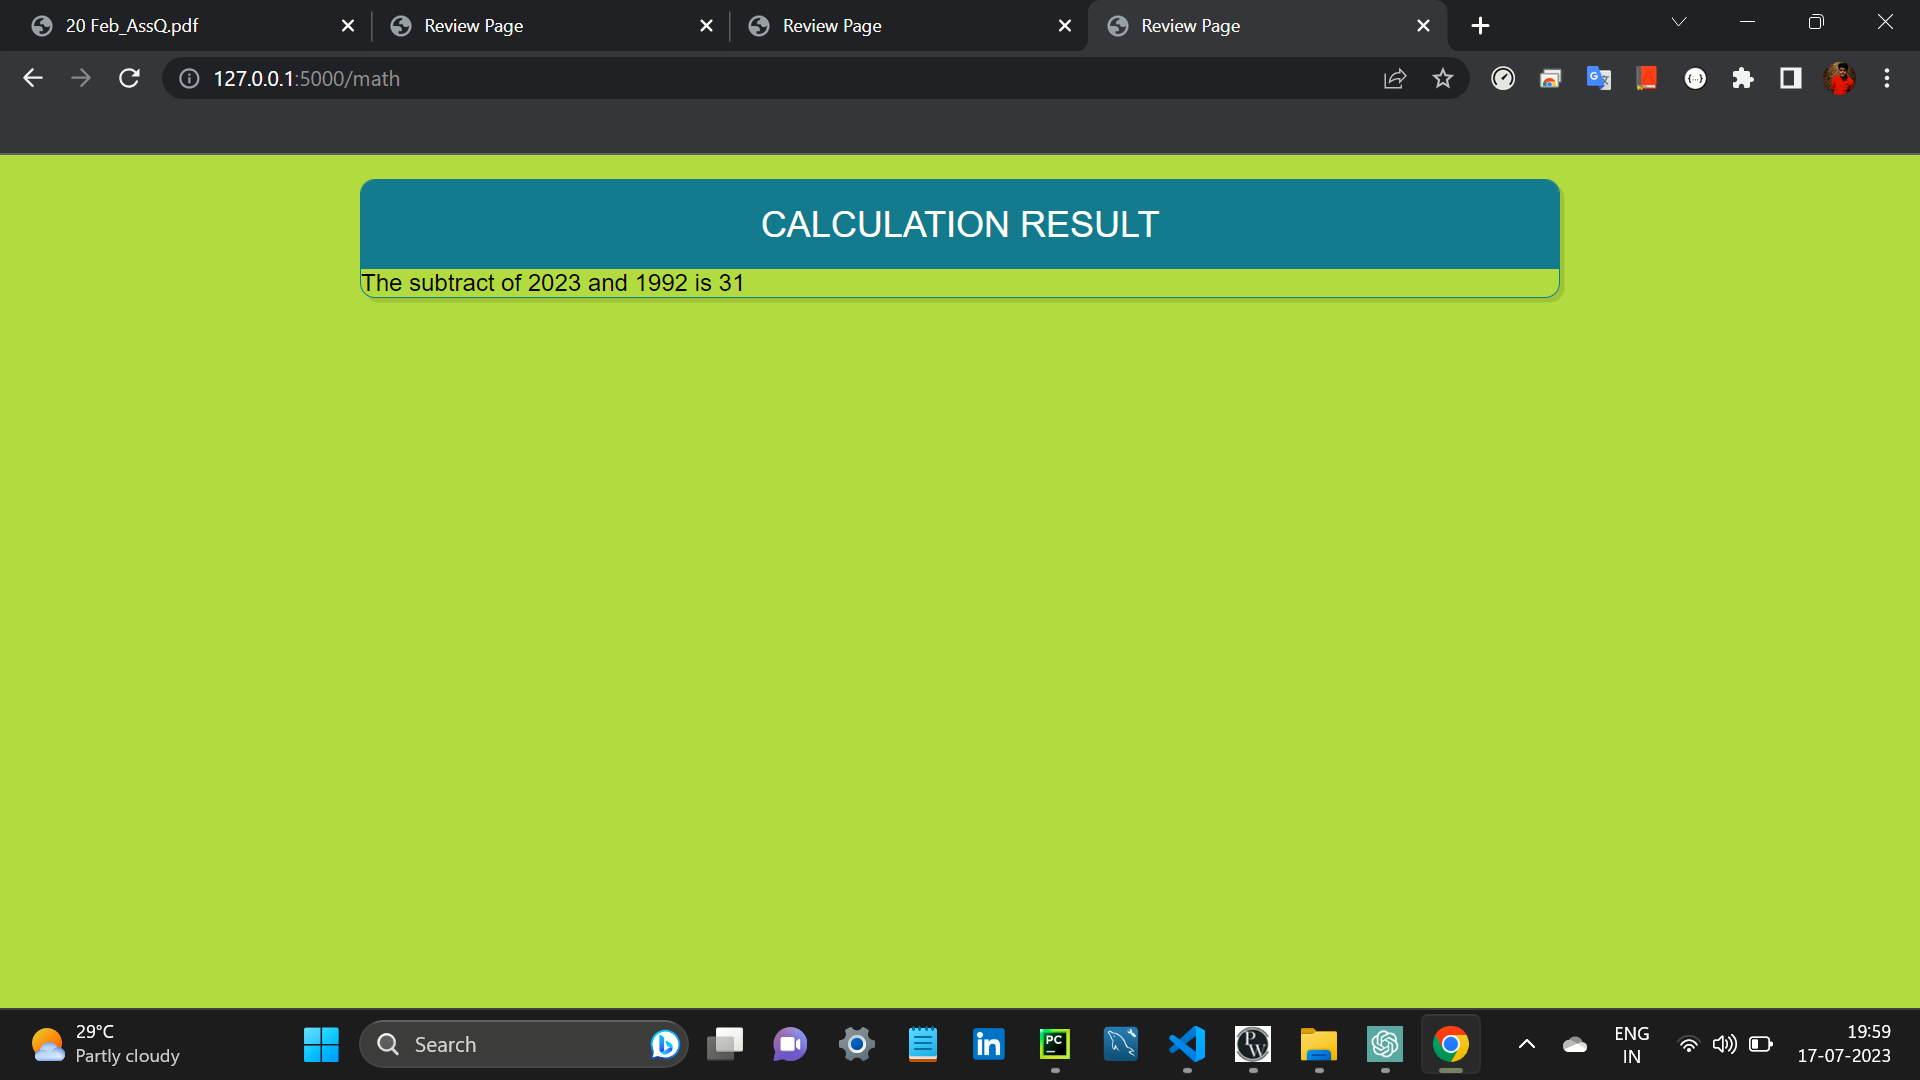

In [3]:
from IPython.display import Image
Image(filename='Result.png')

----------------------------------------------------------------------------------------------------------------

Q.No-02    Why is request used in Flask?

Ans :-

In Flask, the `request` object is used to access incoming request data in a Flask application. It provides a way to retrieve information such as form data, query parameters, and HTTP headers sent by the client.

The `request` object is an instance of the `Request` class, which encapsulates the HTTP request made by the client. It is automatically created and made available by Flask within the context of a request handling function.

Here's a simple example that demonstrates the usage of the `request` object in Flask:

In [2]:
from flask import Flask, request, render_template, url_for

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def home():
    return render_template('home.html')

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']

        # Perform login validation and authentication

        return 'Login successful'
    else:
        return render_template('login.html')

@app.route('/login_url')
def login_url():
    url = url_for('login')
    return f'The URL for login route is: {url}'

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Jul/2023 20:38:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2023 20:38:47] "GET /login HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2023 20:39:02] "GET /login HTTP/1.1" 200 -
127.0.0.1 - - [18/Jul/2023 20:39:41] "POST /login HTTP/1.1" 200 -


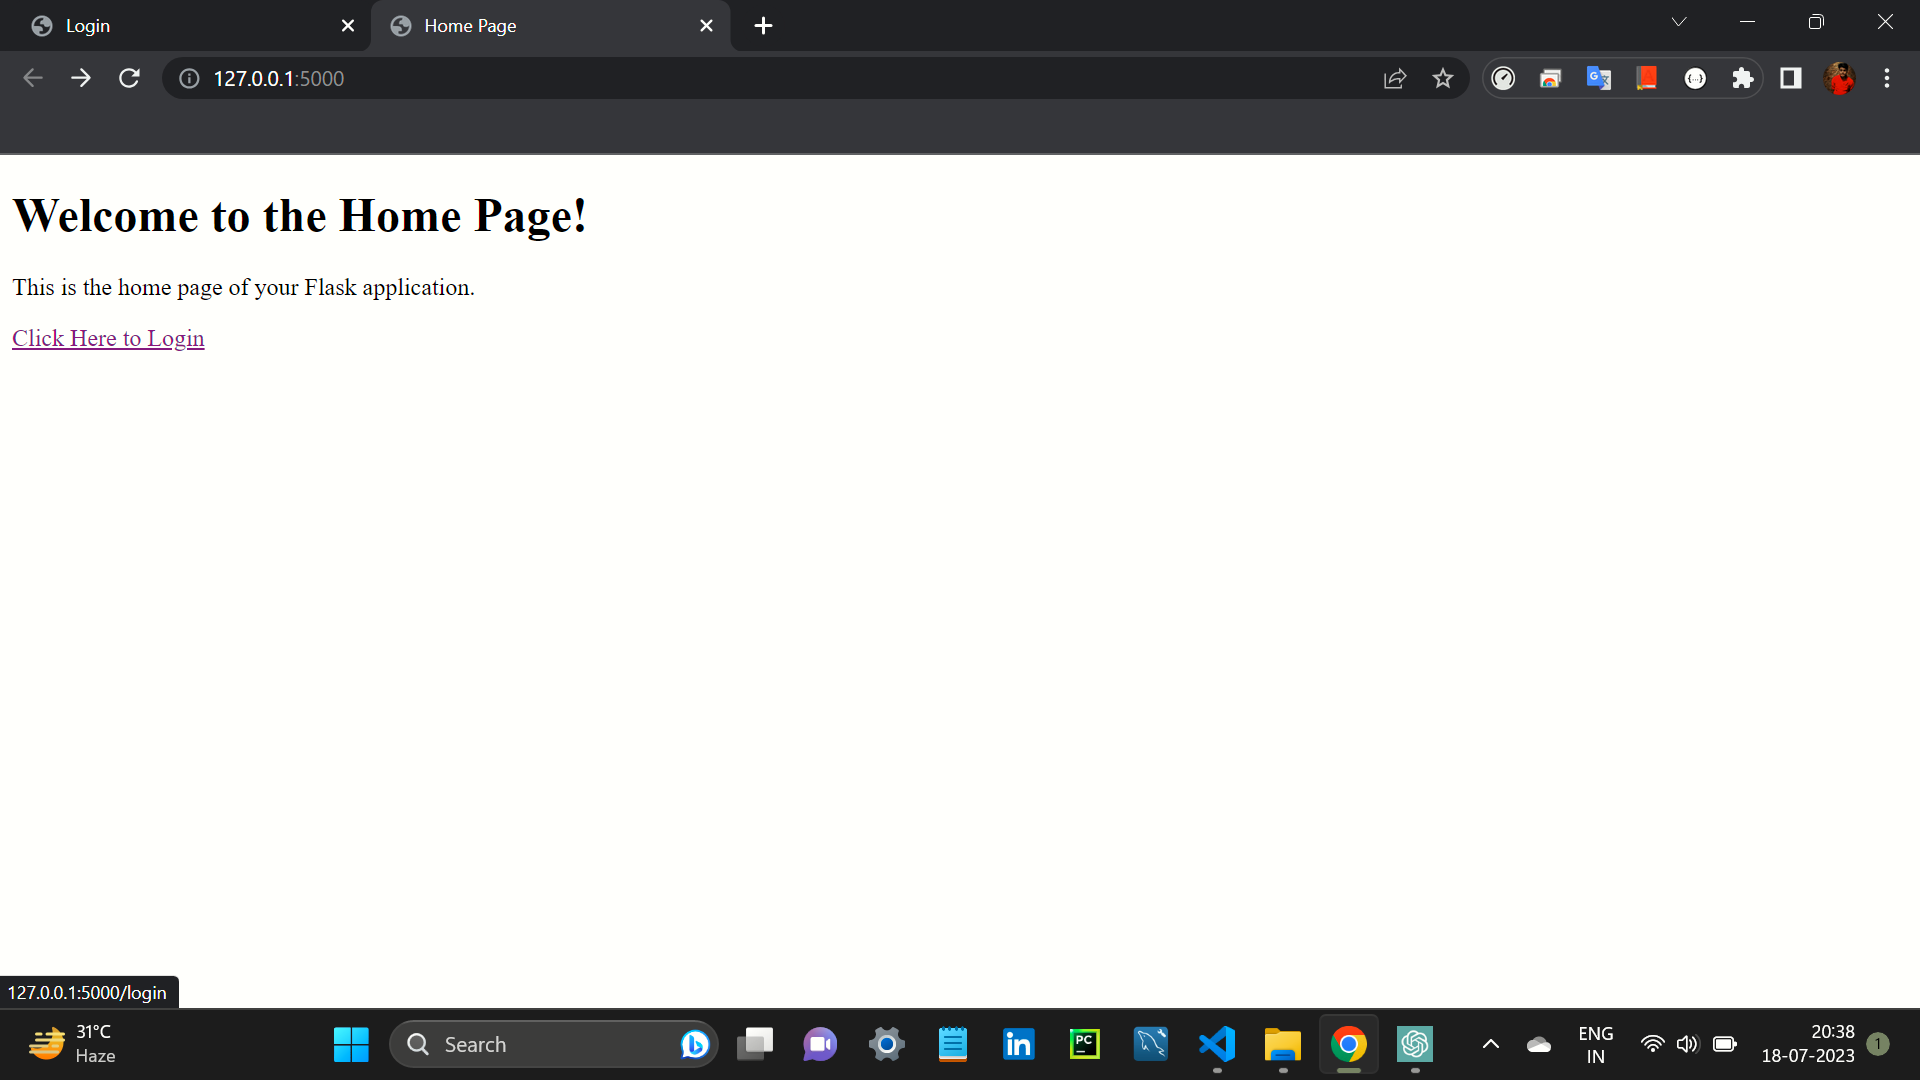

In [5]:
from IPython.display import Image
Image(filename='Home_login.png')

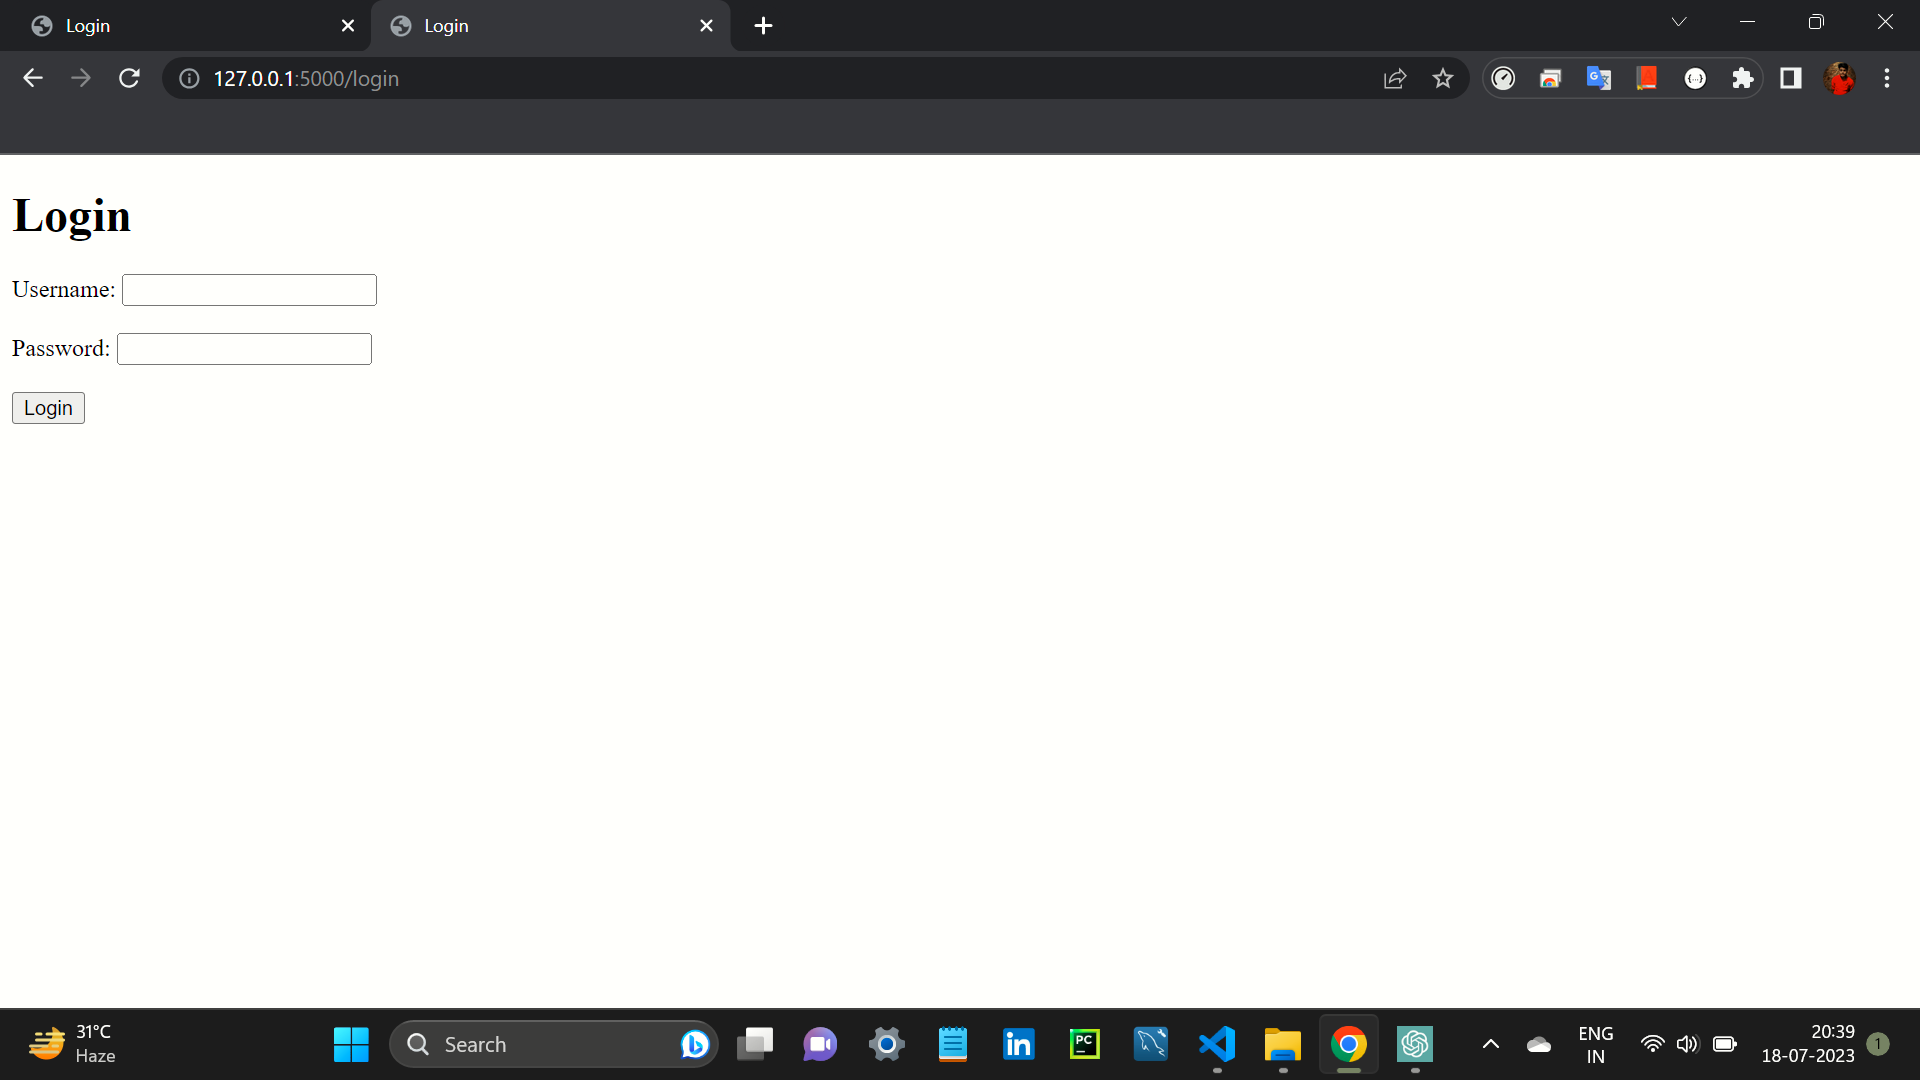

In [6]:
from IPython.display import Image
Image(filename='Login.png')

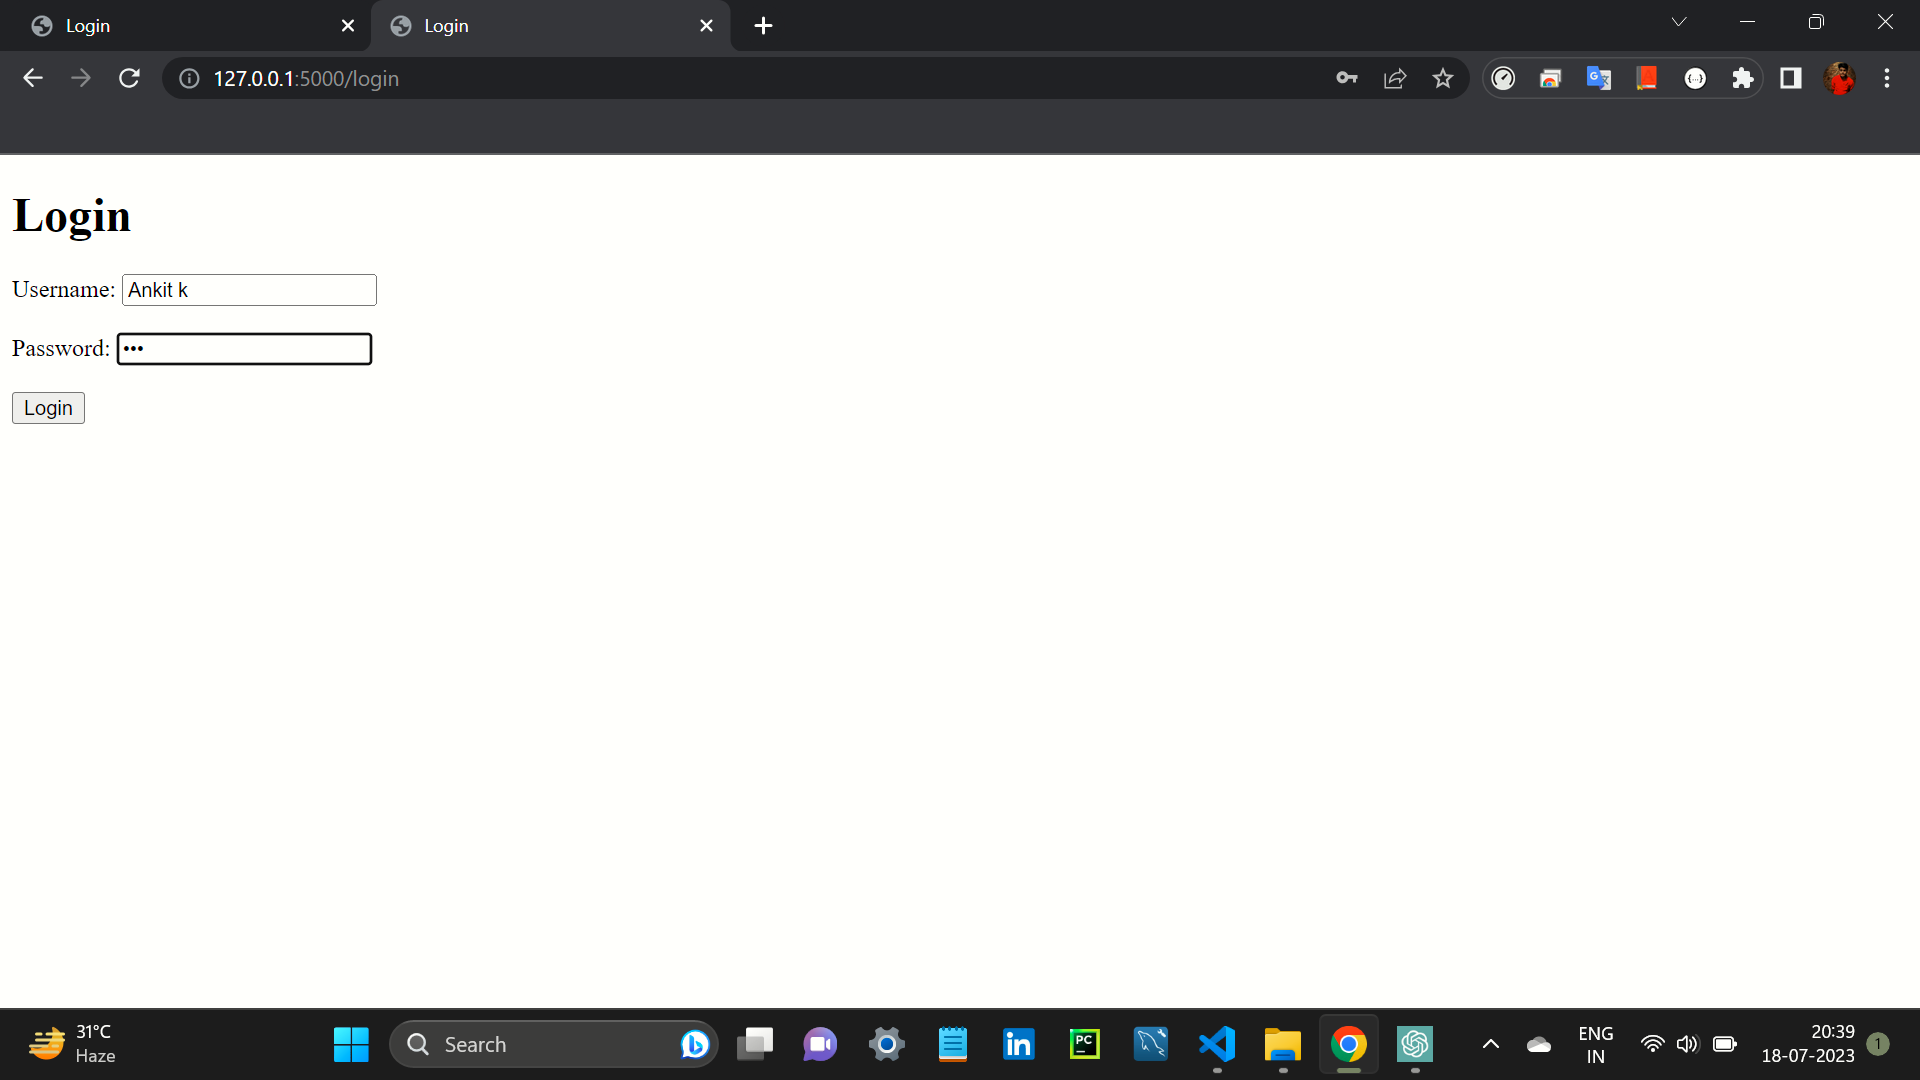

In [8]:
from IPython.display import Image
Image(filename='User_Pass.png')

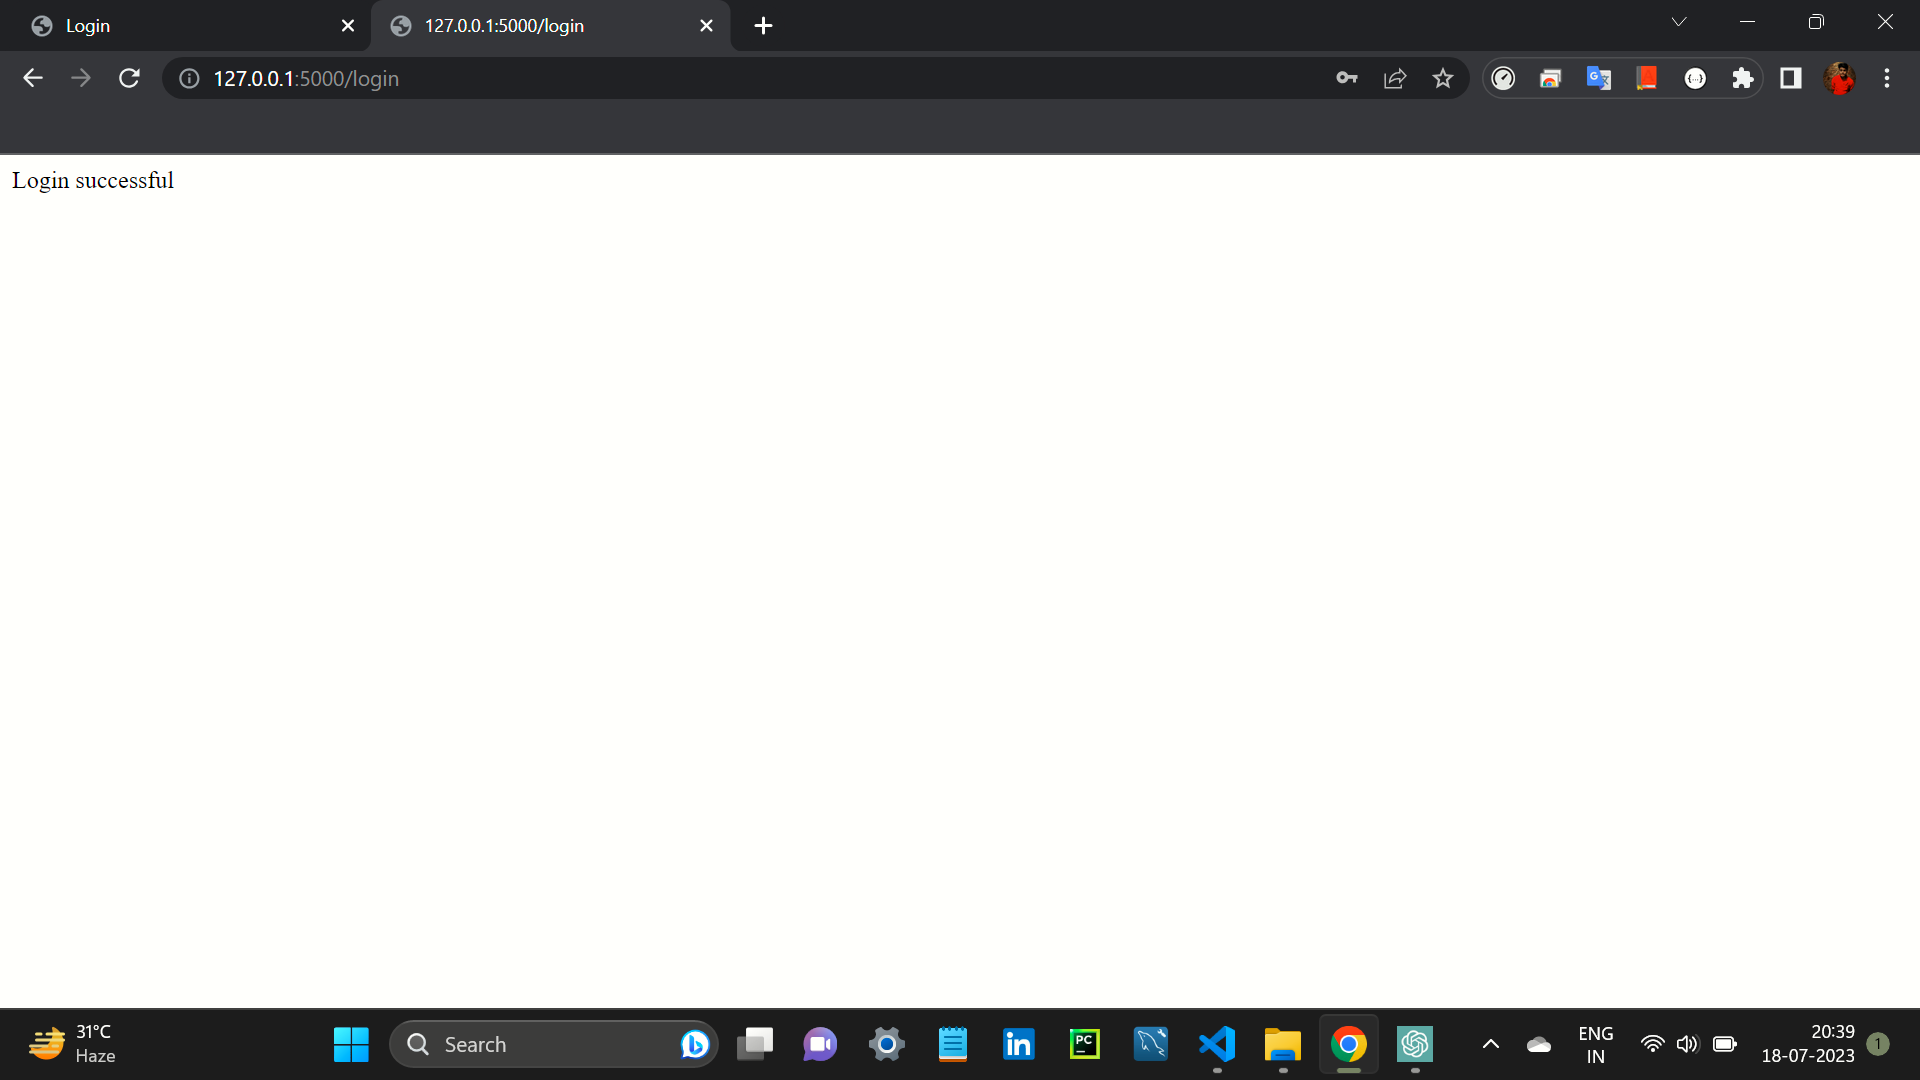

In [14]:
from IPython.display import Image
Image(filename='Login_Succesful.png')

----------------------------------------------------------------------------------------------------------------

Q.No-03    Why is redirect() used in Flask?

Ans :-

In Flask, the `redirect()` function is used to redirect the user's browser to a different route or URL. It is commonly used when you want to redirect the user to another page after they have completed a certain action or when you want to redirect them to a different route based on some conditions.

Here's an example to illustrate the usage of `redirect()` in Flask:

In [12]:
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/')
def index():
    # Redirecting to the hello() route
    return redirect(url_for('hello'))

@app.route('/hello')
def hello():
    return 'Hello, World!'

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [19/Jul/2023 09:44:56] "GET / HTTP/1.1" 302 -
127.0.0.1 - - [19/Jul/2023 09:44:56] "GET /hello HTTP/1.1" 200 -


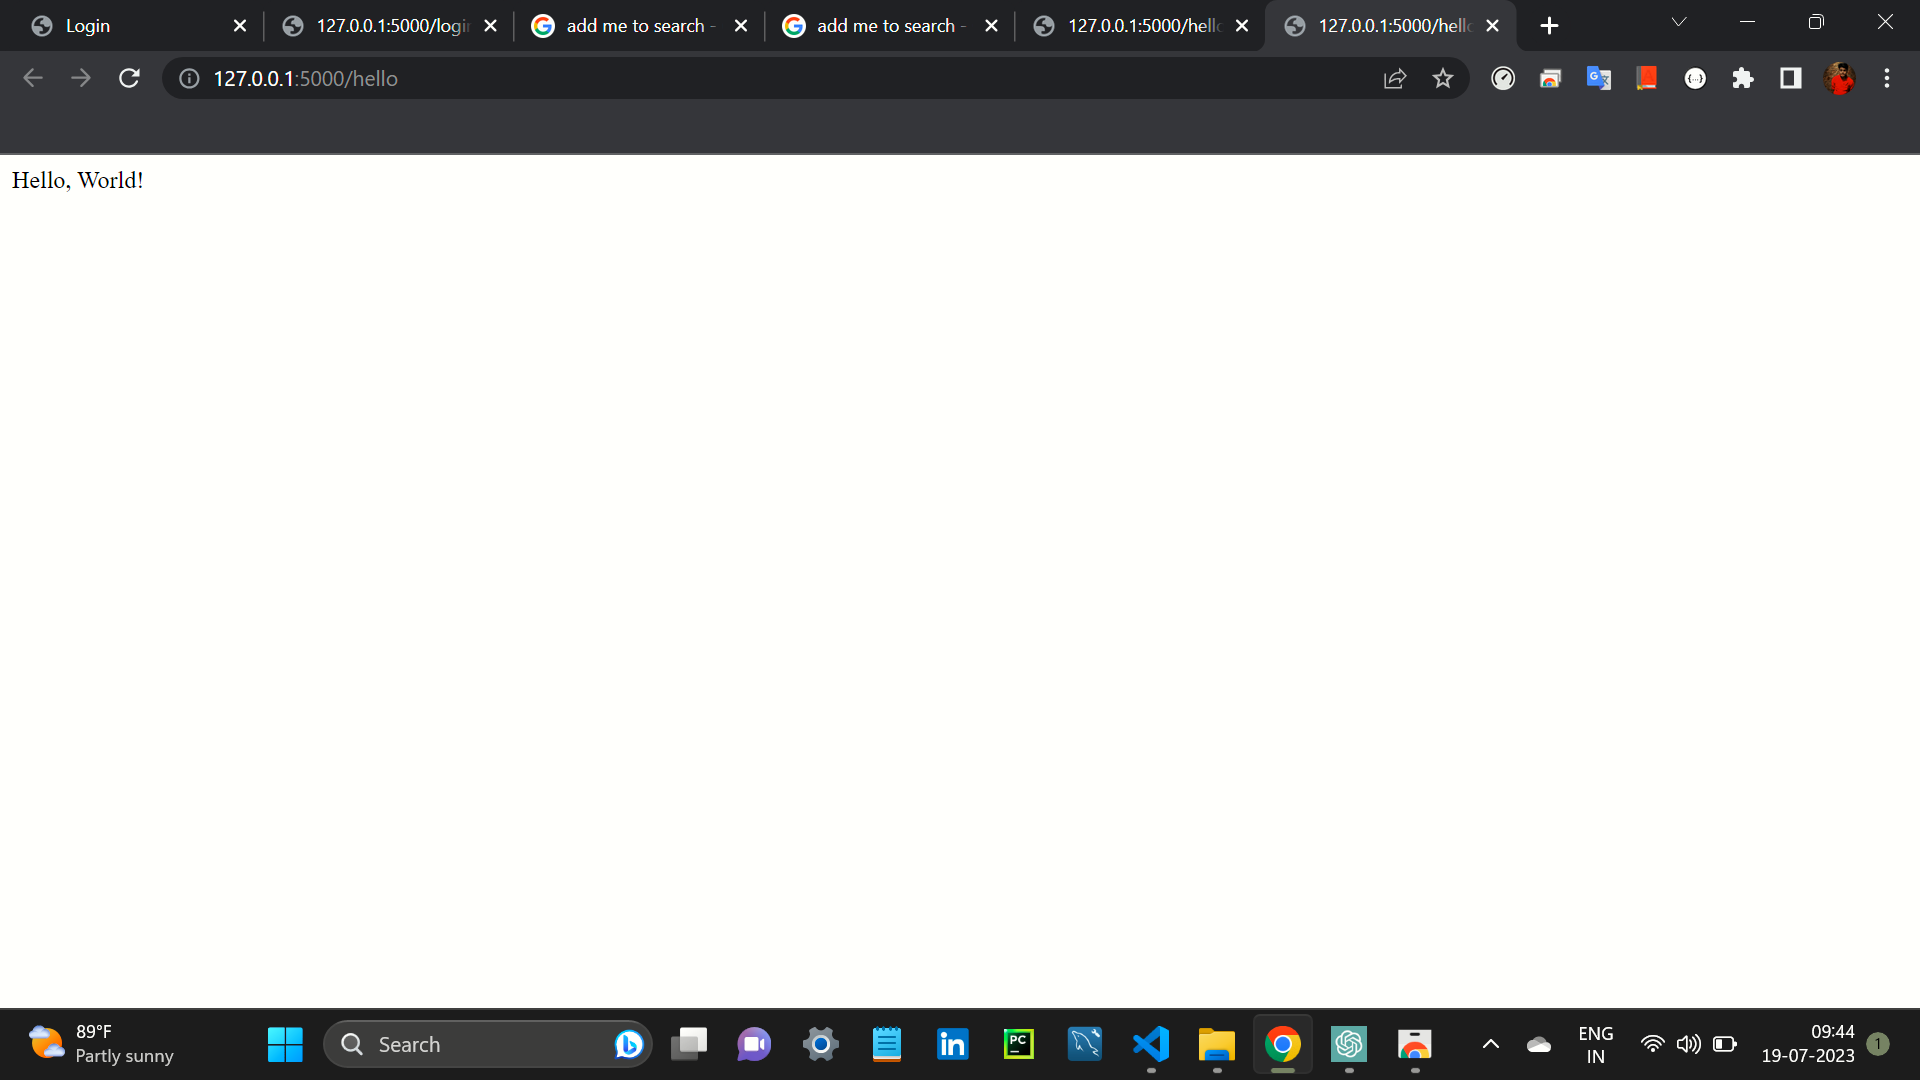

In [15]:
from IPython.display import Image
Image(filename='Hello_World.png')

The `redirect()` function can also be used with absolute URLs. For example:

In [13]:
from flask import Flask, redirect

app = Flask(__name__)

@app.route('/')
def index():
    # Redirecting to an external URL
    return redirect('https://www.google.com/search?q=add+me+to+search&rlz=1C1CHBF_enIN1050IN1050&oq=add&aqs=chrome.1.69i57j35i39i650j0i67i650j46i67i175i199i650j0i67i650j0i512j0i67i650j46i10i131i199i433i465i512j0i67i650j0i10i131i433i512.3441j0j7&sourceid=chrome&ie=UTF-8')

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [19/Jul/2023 09:45:15] "GET / HTTP/1.1" 302 -


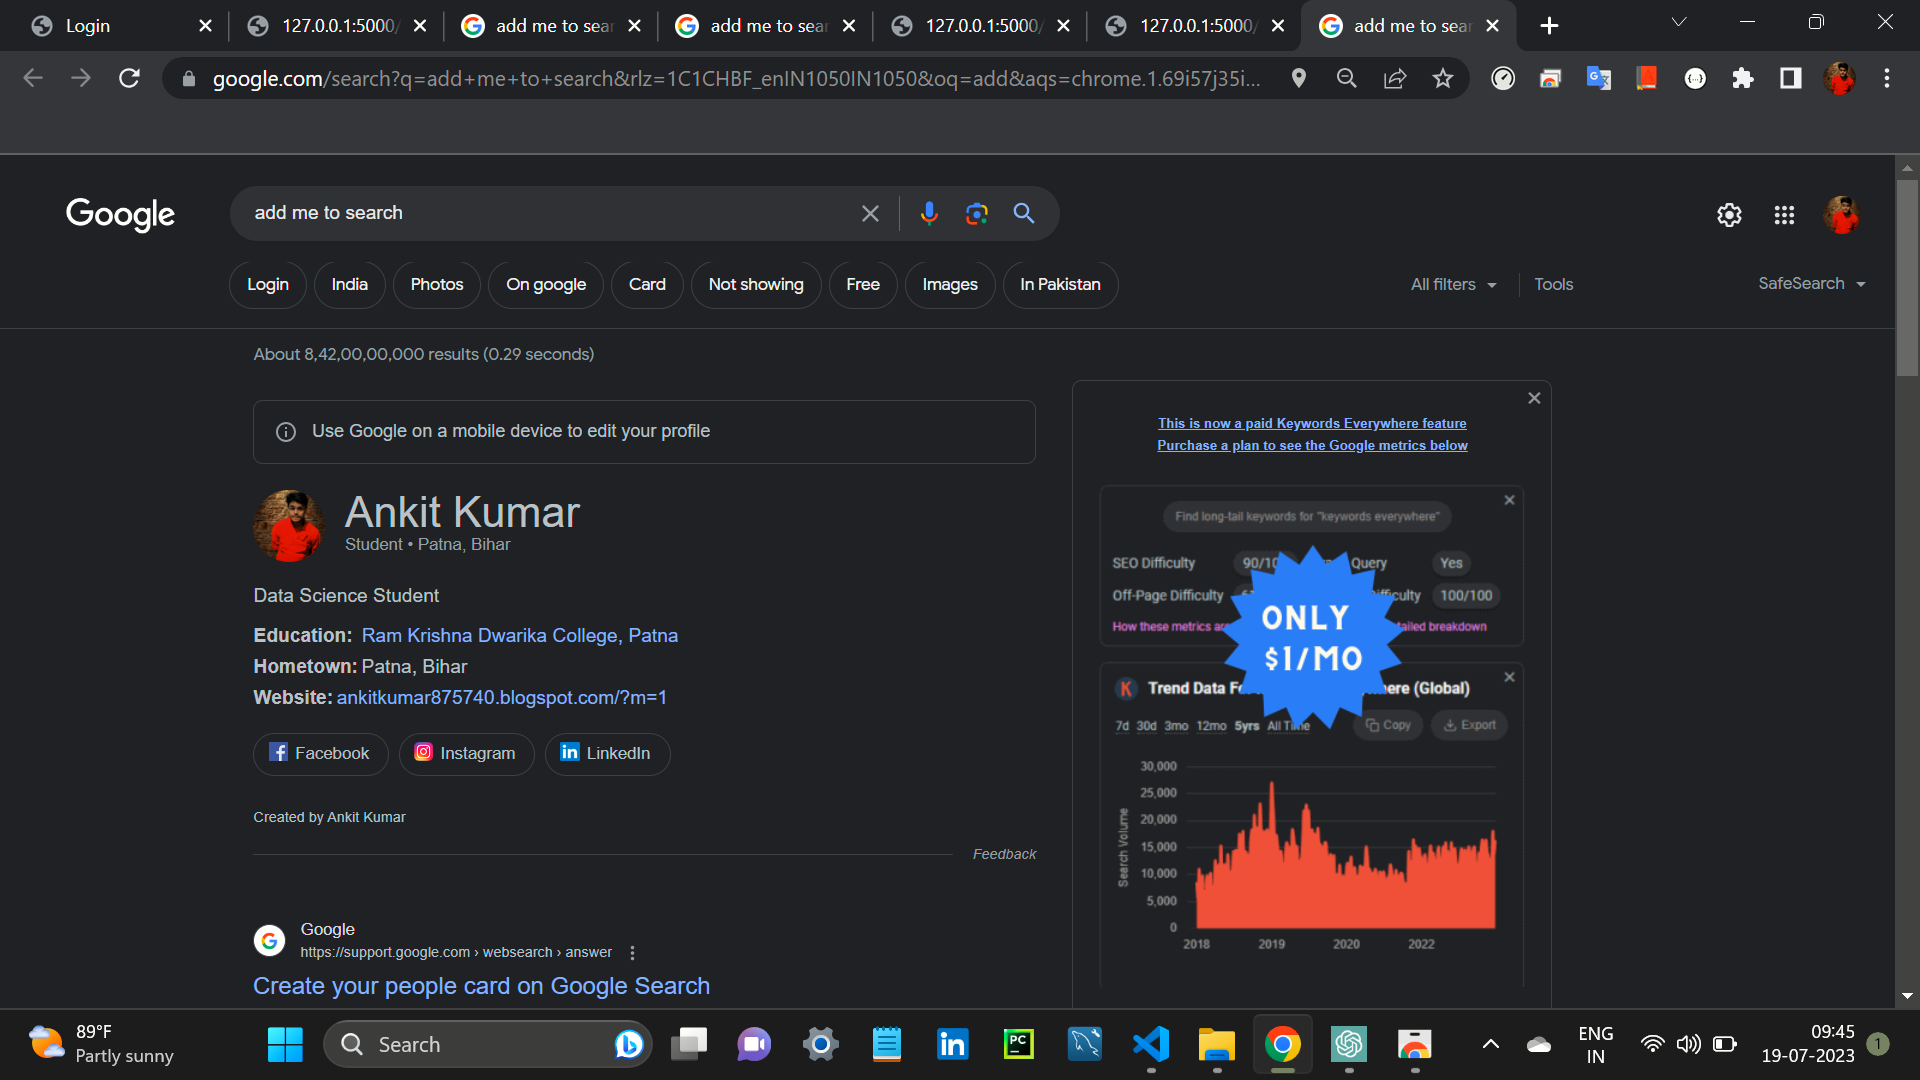

In [19]:
from IPython.display import Image
Image(filename='Add_me_to_Search.png')

Overall, the `redirect()` function in Flask is useful for directing users to different routes or external URLs, making it easier to manage user navigation and control the flow of your application.

--------------------------------------------------------------------------------------------------------------------

Q.No-04    What are templates in Flask? Why is the render_template() function used?

Ans :-

In Flask, templates are files that contain the structure and layout of your web application's HTML pages. They are used to separate the presentation logic from the application logic, allowing you to generate dynamic HTML pages by combining data from your Python code with predefined HTML templates.

The `render_template()` function in Flask is used to render these templates and generate HTML pages dynamically. It takes a template file as input, along with any necessary data, and returns the rendered HTML to be sent back to the client's browser.

Here's an example to illustrate the usage of templates and the `render_template()` function in Flask:

In [18]:

from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def index():
    # Passing data to the template
    name = 'John'
    return render_template('Example.html', name=name)

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [19/Jul/2023 14:20:48] "GET / HTTP/1.1" 200 -


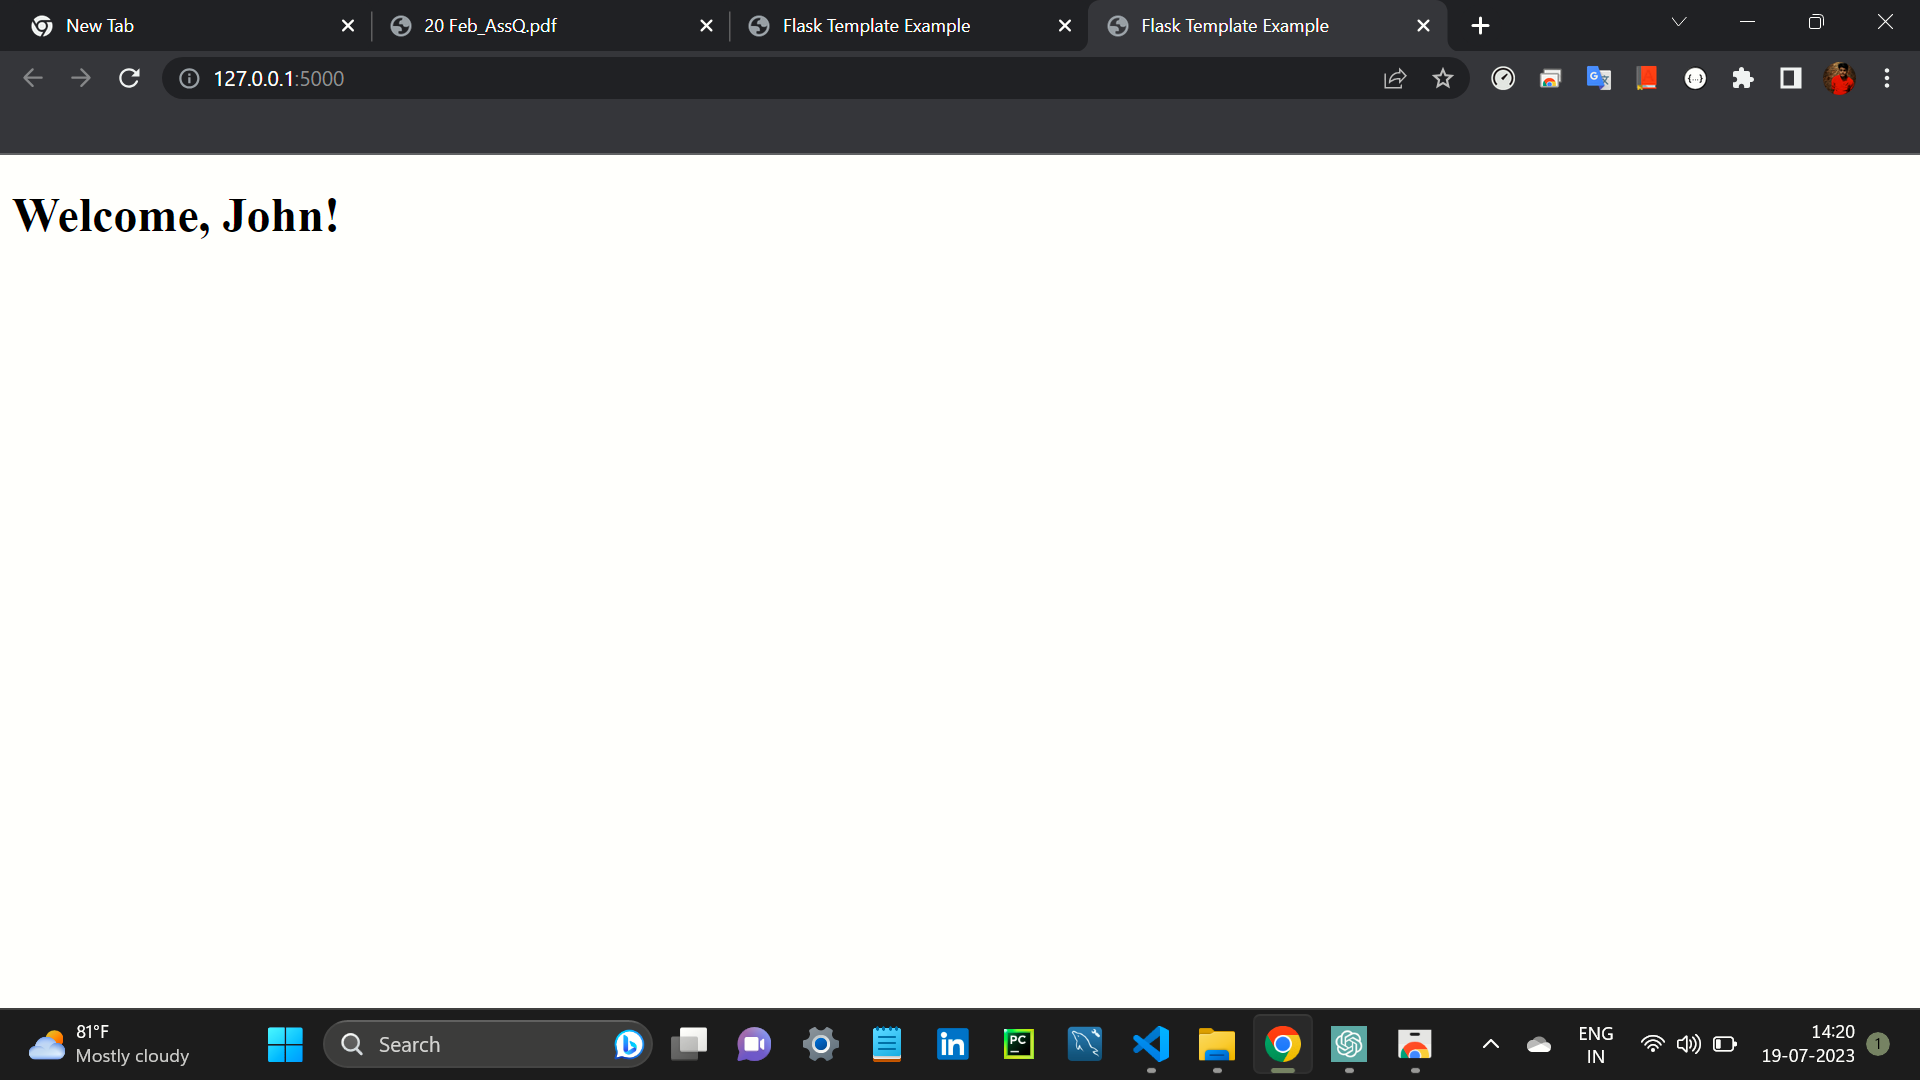

In [3]:
from IPython.display import Image
Image(filename='Welcome_Jhon.png')

--------------------------------------------------------------------------------------------------------------------

Q.No-05    Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

Ans :-

In [2]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Sample data for testing
data = [{"id": 1, "name": "John"}, {"id": 2, "name": "Alice"}]

# Route to handle GET request
@app.route('/', methods=['GET'])
def get_users():
    return jsonify(data)

# Route to handle POST request
@app.route('/api/users', methods=['POST'])
def add_user():
    new_user = request.json
    data.append(new_user)
    return jsonify(new_user), 201

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


127.0.0.1 - - [20/Jul/2023 12:41:30] "GET / HTTP/1.1" 200 -


127.0.0.1 - - [20/Jul/2023 12:41:56] "GET / HTTP/1.1" 200 -


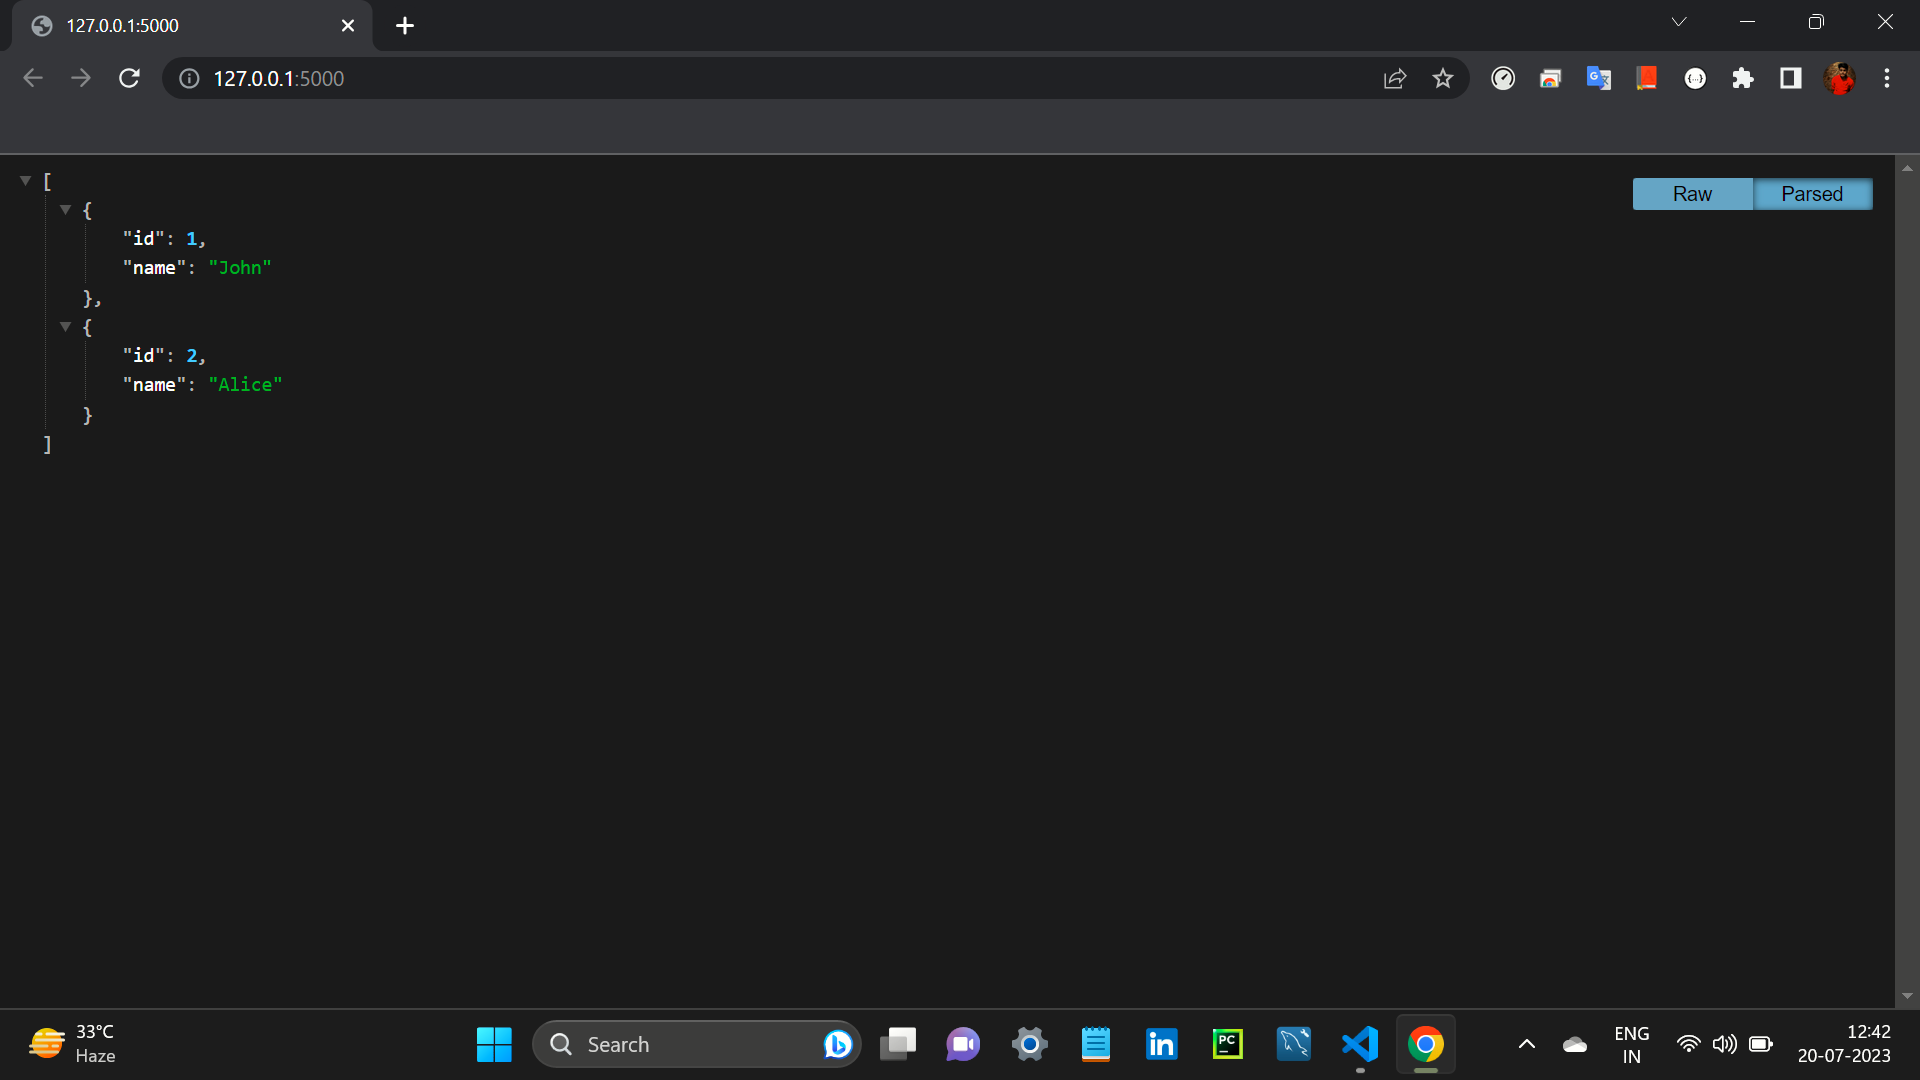

In [4]:
from IPython.display import Image
Image(filename='Simple_API.png')

                                        END                                        